### **Analyse et Modélisation des Émissions de CO2 et de la Consommation d'Énergie des Bâtiments à Seattle**


### **Introduction**


Bienvenue dans ce notebook consacré à l'analyse et à la modélisation des émissions de CO2 et de la consommation d'énergie des bâtiments à Seattle. Ce projet me permet d'illustrer mes compétences en **Python** pour l'analyse, la visualisation et le nettoyage des données, ainsi que la préparation des données pour la création de modèles prédictifs. Ces étapes sont essentielles dans la prise en main des données et constituent une partie fondamentale de tout projet de data science. Voici un aperçu de ce que nous allons couvrir :

1. **Préparation et Analyse Exploratoire des Données (AED)**
2. **Variables Structurelles des Bâtiments**
3. **Feature Engineering**

#### Utilisation de Python pour l'Analyse, la Visualisation et le Nettoyage des Données

L'utilisation de bibliothèques Python telles que **Pandas**, **NumPy**, **Seaborn** et **Matplotlib** permet de réaliser une **analyse exploratoire des données (AED)** de manière efficace et rigoureuse. Ces outils sont essentiels pour explorer les données, visualiser les distributions et relations entre les variables, et identifier les valeurs manquantes ou aberrantes. Le **nettoyage des données** est une étape cruciale pour garantir la qualité des données avant la modélisation.

#### Objectif de la Préparation des Données pour la Création d'un Modèle Prédictif

Dans ce projet, l'objectif est de préparer les données pour la **création de modèles prédictifs**. Il est important d'identifier les **variables cibles**, c'est-à-dire ce que nous cherchons à prédire. Ces variables cibles sont souvent coûteuses et chronophages à collecter, et nous souhaitons les remplacer par des valeurs prédites. Pour ce dataset, les variables cibles incluent la **consommation d'énergie** et les **émissions de CO2**.

#### Importance des Variables Structurelles

Les **variables structurelles des bâtiments**, telles que le type de propriété, l'année de construction, la superficie et le nombre d'étages, sont généralement plus faciles à collecter que les variables cibles. L'analyse de ces variables permet de déterminer si elles sont **corrélées** avec les cibles et donc si elles peuvent améliorer la précision des prédictions. Cette étape est une forme d'**enquête** qui peut aboutir à la création de **variables hybrides** pour optimiser les performances des modèles prédictifs.  
  
**Exemple de variable hybride: Regroupement des Types d'Usage**  
Dans ce dataset, les types d'usage des bâtiments sont nombreux et peuvent être trop spécifiques pour être significatifs. Nous avons donc **regroupé les types d'usage** en **catégories plus larges** en fonction de l'importance de la consommation d'énergie de chaque catégorie. Ce regroupement aide à simplifier l'analyse et à améliorer la modélisation.

#### Préparation pour la Modélisation

L'étape de **transformation numérique des variables** est essentielle pour préparer les données pour la modélisation. Cependant, pour éviter d'introduire des biais, cette transformation sera appliquée **séparément sur les ensembles d'entraînement (train) et de test (test)** dans les notebooks suivants. Ce principe est crucial pour garantir que le modèle généralisera bien sur des données non vues.

En suivant ces principes, nous nous assurons que les données sont de haute qualité et prêtes pour une modélisation efficace, ce qui constitue une démonstration claire de mes compétences en data science.


### **Sommaire**



1. **Préparation et Analyse Exploratoire des Données (AED)**
   - **Chargement des données**
   - **Classification des types de bâtiments**
   - **Visualisation des types de bâtiments**
   - **Nettoyage des données**
     - Suppression des types de bâtiments multifamiliaux
     - Analyse des données manquantes
     - Détection des doublons
   - **Exploration des variables cibles**
     - Visualisation des distributions
     - Relation entre consommation et émissions
     - Distribution des types d'énergie
     - Classification par source d'énergie dominante
     - Visualisation de la consommation par catégorie d'énergie

2. **Variables Structurelles des Bâtiments**
   - **Variables Catégorielles**
     - Transformation de la variable 'Neighborhood' en minuscule
     - Distribution des types de propriété principale ('PrimaryPropertyType')
     - Répartition des types de propriétés par quartier
     - Visualisation des corrélations
   - **Variables Structurelles Numériques**
     - Distribution de l'année de construction
     - Relation entre l'année de construction et les variables cibles
     - Superficie et hauteur des bâtiments
       - Distribution des superficies
       - Relation entre la superficie et la consommation d'énergie
       - Relation entre le nombre d'étages et la consommation d'énergie
       - Superficie par étage
   - **Localisation**
     - Distribution de la longitude et de la latitude
     - Analyse par code postal (ZipCode)
     - TaxParcelIdentificationNumber
   - **Outliers**
   - **ENERGY STAR Score**
     - Distribution de l'ENERGYSTARScore
     - Relation entre l'ENERGYSTARScore et la consommation d'énergie
     - Relation entre l'ENERGYSTARScore et les émissions de CO2
     - Imputation des valeurs manquantes de l'ENERGYSTARScore

3. **Feature Engineering**
   - Traitement des variables catégorielles
   - Transformation mathématique des variables



### **Importation des bibliothèques nécessaires**

Nous importons ici les bibliothèques nécessaires pour la manipulation des données, la visualisation et la modélisation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# affichage detoutes les colonnes
pd.set_option('display.max_columns', None)

### **1. Préparation et Analyse Exploratoire des Données (AED)**

#### Chargement des Données
Nous commençons par charger les données de consommation d'énergie et des émissions de CO2 des bâtiments à Seattle à partir d'un fichier CSV.


In [2]:
data = pd.read_csv('./2016_Building_Energy_Benchmarking (1).csv')
data

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3371      NaN                    1624049080                    2   
3372      NaN                    3558300000                    2   
3373      NaN                    1794501150                    7   
3374      NaN                    7883603155                    1   
3375      NaN                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
1                  DOWNTOWN  47.61317 -122.33393       1996   
2                  DOWNTOWN  47.61393 -122.33810       1969   
3                  DOWNTOWN  47.61412 -122.33664       1926   
4                  DOWNTOWN  47.61375 -122.34047       1980   
...                     ...       ...        ...        ...   
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   
3372               DOWNTOWN  47.59625 -122.32283       2004   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374       GREATER DUWAMISH  47.52832 -122.32431       1989   
3375       GREATER DUWAMISH  47.53939 -122.29536       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3371                1.0               1            

#### Classification des Types de Bâtiments
Ensuite, nous classifions les bâtiments en deux catégories : résidentiels et non résidentiels, afin de mieux structurer notre analyse.

In [3]:
# filtrage des BuildingType
data['BuildingType'].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

In [4]:
res = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']
non_res = ['SPS-District K-12', 'Nonresidential COS', 'Campus', 'Nonresidential WA', 'NonResidential', 'Nonresidential']

# Fonction pour classifier le type de bâtiment
def classify_building_type(building_type):
    if building_type in res:
        return 1  # Résidentiel
    elif building_type in non_res:
        return 0  # Non résidentiel
    else:
        return None  # Pour les types qui ne sont ni explicitement résidentiels ni non résidentiels

# Application de la fonction pour créer la nouvelle colonne 'CategoryGroup'
data['CategoryGroup'] = data['BuildingType'].apply(classify_building_type)

#### Visualisation des Types de Bâtiments
Nous visualisons la distribution des différents types de bâtiments et distinguons les catégories résidentielle et non résidentielle.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


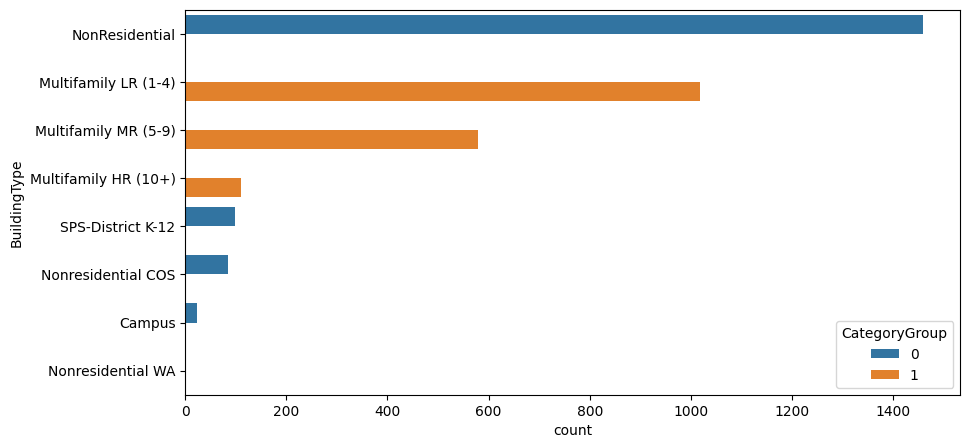

In [5]:
# Convertir la colonne 'CategoryGroup' en chaînes de caractères si ce n'est pas déjà le cas
data['CategoryGroup'] = data['CategoryGroup'].astype(str)

# Ensuite, tracer le graphique
plt.figure(figsize=(10, 5))
sns.countplot(y='BuildingType', data=data, order=data['BuildingType'].value_counts().index, hue='CategoryGroup')
plt.show()



#### Nettoyage des Données

##### Suppression des types de bâtiments multifamiliaux
Nous supprimons les types de bâtiments multifamiliaux pour nous concentrer sur les bâtiments non résidentiels.

In [6]:
# suppression des lignes avec BuildingType = 'Multifamily'
data_non_R = data[data['BuildingType'] != 'Multifamily LR (1-4)']
data_non_R = data_non_R[data_non_R['BuildingType'] != 'Multifamily MR (5-9)']
data_non_R = data_non_R[data_non_R['BuildingType'] != 'Multifamily HR (10+)']

data_non_R.shape

(1668, 47)

##### Analyse des Données Manquantes
Nous examinons le pourcentage de valeurs manquantes pour chaque colonne afin d'identifier les variables nécessitant un traitement particulier.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


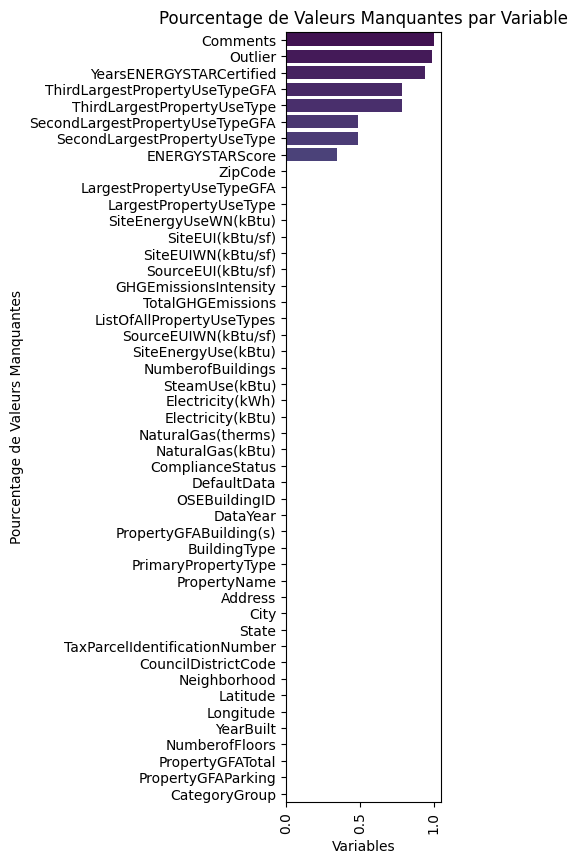

In [7]:
# Calculer le pourcentage de données manquantes par colonne
missing_data = data_non_R.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(2,10))
ax = sns.barplot(y=missing_data.index, x=missing_data.values, palette='viridis')
plt.title('Pourcentage de Valeurs Manquantes par Variable')
plt.xlabel('Variables')
plt.ylabel('Pourcentage de Valeurs Manquantes')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


##### Détection des Doublons
Nous vérifions le nombre de doublons dans les données.

In [8]:
# détection des doublons
data_non_R.duplicated().sum()


0

#### Visualisation des type de données

<Axes: ylabel='count'>

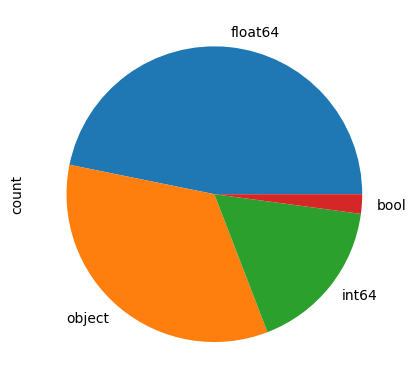

In [9]:
# Visualisation des type de donness camembert
data_non_R.dtypes.value_counts().plot.pie()


In [10]:
# sauvegarde du dataset filtré
#data_non_R.to_csv('./2016_Building_Energy_Benchmarking_non_R.csv', index=False)
# charger le dataset filtré
#data_non_R = pd.read_csv('./2016_Building_Energy_Benchmarking_non_R.csv')

#### Exploration des Variables Cibles

##### Identification et corrélation
Nous définissons les variables cibles pour la consommation d'énergie et les émissions de CO2.

In [11]:
# variable cible pour la consomation d'energie
conso_site=data_non_R['SiteEUIWN(kBtu/sf)']
conso_source=data_non_R['SourceEUIWN(kBtu/sf)']

# variable directement corrélé à la consomation d'energie
cols_conso=data_non_R[[ 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']]
cols_type_energy=data_non_R[['SteamUse(kBtu)','Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']]

# variable cible pour les emissions de CO2
CO2_intensity=data_non_R['GHGEmissionsIntensity']
cols_CO2=data_non_R[['GHGEmissionsIntensity','TotalGHGEmissions']]

fuite=data_non_R[['ENERGYSTARScore','GHGEmissionsIntensity','TotalGHGEmissions','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SourceEUI(kBtu/sf)',
                  'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)',
                  'SteamUse(kBtu)']]

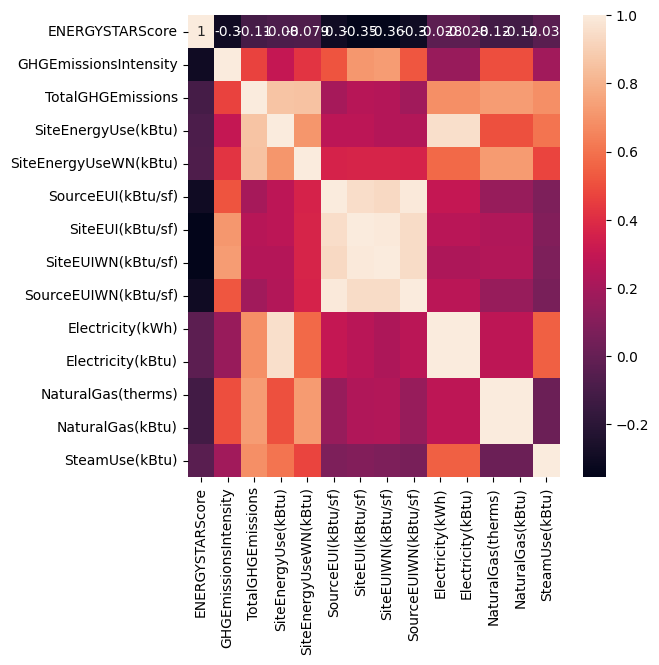

In [12]:
# heatmap des variables corrélées aux variables cibles (fuite)
plt.figure(figsize=(6,6))
sns.heatmap(fuite.corr(), annot=True)
plt.show()

In [13]:
# coefficient de correlation entre les variables
fuite.corr()

ENERGYSTARScore  GHGEmissionsIntensity  \
ENERGYSTARScore               1.000000              -0.297997   
GHGEmissionsIntensity        -0.297997               1.000000   
TotalGHGEmissions            -0.108145               0.467224   
SiteEnergyUse(kBtu)          -0.080135               0.298053   
SiteEnergyUseWN(kBtu)        -0.079498               0.427189   
SourceEUI(kBtu/sf)           -0.297920               0.513501   
SiteEUI(kBtu/sf)             -0.350665               0.711139   
SiteEUIWN(kBtu/sf)           -0.355019               0.725336   
SourceEUIWN(kBtu/sf)         -0.300041               0.520236   
Electricity(kWh)             -0.028411               0.160195   
Electricity(kBtu)            -0.028411               0.160195   
NaturalGas(therms)           -0.117790               0.497240   
NaturalGas(kBtu)             -0.117790               0.497240   
SteamUse(kBtu)               -0.039023               0.189486   

                       TotalGHGEmissions  SiteEnergyUse(kBtu)  \
ENERGYSTARScore                -0.108145            -0.080135   
GHGEmissionsIntensity           0.467224             0.298053   
TotalGHGEmissions               1.000000             0.859940   
SiteEnergyUse(kBtu)             0.859940             1.000000   
SiteEnergyUseWN(kBtu)           0.855982             0.704050   
SourceEUI(kBtu/sf)              0.203679             0.270029   
SiteEUI(kBtu/sf)                0.257353             0.272841   
SiteEUIWN(kBtu/sf)              0.244926             0.243171   
SourceEUIWN(kBtu/sf)            0.189798             0.241311   
Electricity(kWh)                0.686572             0.956264   
Electricity(kBtu)               0.686572             0.956264   
NaturalGas(therms)              0.725999             0.503369   
NaturalGas(kBtu)                0.725999             0.503369   
SteamUse(kBtu)                  0.684001             0.605002   

                       SiteEnergyUseWN(kBtu)  SourceEUI(kBtu/sf)  \
ENERGYSTARScore                    -0.079498           -0.297920   
GHGEmissionsIntensity               0.427189            0.513501   
TotalGHGEmissions                   0.855982            0.203679   
SiteEnergyUse(kBtu)                 0.704050            0.270029   
SiteEnergyUseWN(kBtu)               1.000000            0.359801   
SourceEUI(kBtu/sf)                  0.359801            1.000000   
SiteEUI(kBtu/sf)                    0.367244            0.947907   
SiteEUIWN(kBtu/sf)                  0.364939            0.934756   
SourceEUIWN(kBtu/sf)                0.359604            0.994005   
Electricity(kWh)                    0.573420            0.297760   
Electricity(kBtu)                   0.573420            0.297760   
NaturalGas(therms)                  0.723368            0.156777   
NaturalGas(kBtu)                    0.723368            0.156777   
SteamUse(kBtu)                      0.471165            0.075107   

                       SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
ENERGYSTARScore               -0.350665           -0.355019   
GHGEmissionsIntensity          0.711139            0.725336   
TotalGHGEmissions              0.257353            0.244926   
SiteEnergyUse(kBtu)            0.272841            0.243171   
SiteEnergyUseWN(kBtu)          0.367244            0.364939   
SourceEUI(kBtu/sf)             0.947907            0.934756   
SiteEUI(kBtu/sf)               1.000000            0.993084   
SiteEUIWN(kBtu/sf)             0.993084            1.000000   
SourceEUIWN(kBtu/sf)           0.943962            0.943204   
Electricity(kWh)               0.259684            0.226092   
Electricity(kBtu)              0.259684            0.226092   
NaturalGas(therms)             0.235456            0.238702   
NaturalGas(kBtu)               0.235456            0.238702   
SteamUse(kBtu)                 0.090905            0.076598   

                       SourceEUIWN(kBtu/sf)  Electricity(kWh)  \
ENERGYSTARScore                   -0.30

##### Visualisation des Distributions
Nous visualisons les distributions de la consommation d'énergie sur site et des émissions de CO2.

###### Consommation d'énergie

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


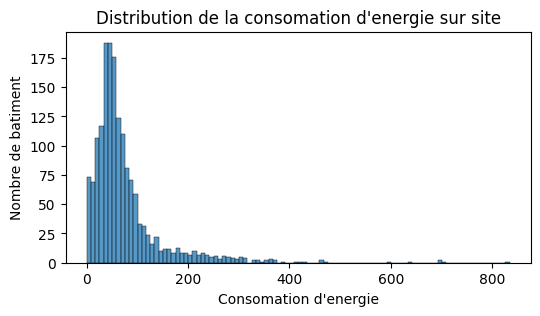

In [14]:
# distribution de la consomation d'energie
plt.figure(figsize=(6,3))
sns.histplot(conso_site, bins=100)
plt.title('Distribution de la consomation d\'energie sur site')
plt.xlabel('Consomation d\'energie')
plt.ylabel('Nombre de batiment')
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


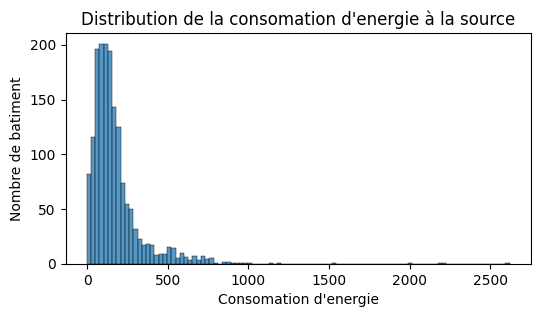

In [15]:
# conso source
plt.figure(figsize=(6,3))
sns.histplot(conso_source, bins=100)
plt.title('Distribution de la consomation d\'energie à la source')
plt.xlabel('Consomation d\'energie')
plt.ylabel('Nombre de batiment')
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


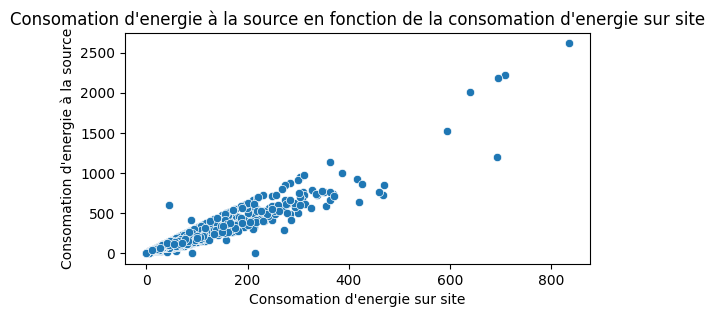

In [16]:
# plot de la consomation d'energie source en fonction de la consomation d'energie site
plt.figure(figsize=(6,3))
sns.scatterplot(x=conso_site, y=conso_source)
plt.title('Consomation d\'energie à la source en fonction de la consomation d\'energie sur site')
plt.xlabel('Consomation d\'energie sur site')
plt.ylabel('Consomation d\'energie à la source')
plt.show()

###### Emissions de CO2

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


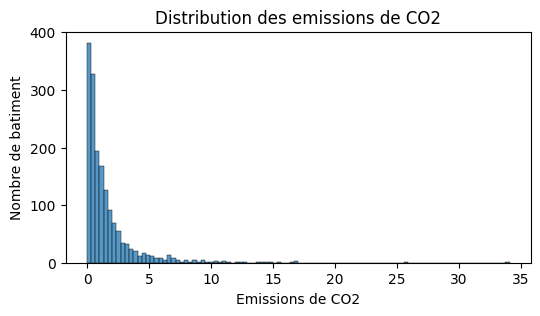

In [17]:
# distribution des emissions de CO2
plt.figure(figsize=(6,3))
sns.histplot(CO2_intensity, bins=100)
plt.title('Distribution des emissions de CO2')
plt.xlabel('Emissions de CO2')
plt.ylabel('Nombre de batiment')
plt.show()

##### Relation entre Consommation et Émissions
Nous explorons les relations entre la consommation d'énergie sur site et à la source, ainsi que la relation entre la consommation d'énergie et les émissions de CO2.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


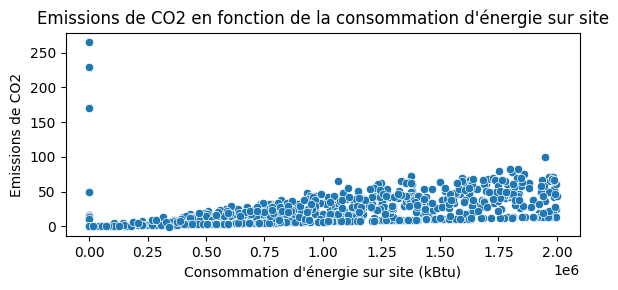

In [18]:
# Filtrer les données pour ne conserver que les observations 
filtered_data = data_non_R[data_non_R['SiteEnergyUse(kBtu)'] <= 2e6]

# Création du scatterplot avec les données filtrées
plt.figure(figsize=(6, 3))
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=filtered_data)
plt.title("Emissions de CO2 en fonction de la consommation d'énergie sur site")
plt.xlabel('Consommation d\'énergie sur site (kBtu)')
plt.ylabel('Emissions de CO2')
plt.tight_layout()  # Ajustement automatique de la figure
plt.show()

In [19]:
# affichage de ligne avec zero en cosomation d'energie
data_non_R[data_non_R['SiteEnergyUse(kBtu)'] == 0]


OSEBuildingID  DataYear       BuildingType PrimaryPropertyType  \
28               34      2016  SPS-District K-12         K-12 School   
31               37      2016  SPS-District K-12         K-12 School   
62               87      2016  SPS-District K-12         K-12 School   
81              118      2016  SPS-District K-12         K-12 School   
85              122      2016  SPS-District K-12         K-12 School   
95              140      2016  SPS-District K-12         K-12 School   
133             217      2016  SPS-District K-12         K-12 School   
139             227      2016  SPS-District K-12         K-12 School   
152             242      2016  SPS-District K-12         K-12 School   
304             435      2016     NonResidential               Other   
614             820      2016  SPS-District K-12         K-12 School   
630             850      2016  SPS-District K-12         K-12 School   
746           19776      2016     NonResidential               Other   
1361          21616      2016  SPS-District K-12         K-12 School   
1894          23722      2016  SPS-District K-12         K-12 School   
3166          49703      2016  SPS-District K-12         K-12 School   

                            PropertyName               Address     City State  \
28                        Meany Building  301/300 21st Ave. E.  Seattle    WA   
31                   John Hay Elementary      201 Garfield St.  Seattle    WA   
62              Arbor Heights Elementary   3701 S.W. 104th St.  Seattle    WA   
81                        Pathfinder K-8   1901 SW Genesee St.  Seattle    WA   
85                  John Muir Elementary    3301 S. Horton St.  Seattle    WA   
95                   B.F. Day Elementary   3921 Linden Ave. N.  Seattle    WA   
133                       Whitman Middle    9201 15th Ave. NW.  Seattle    WA   
139                    Washington Middle       2101 S. Jackson  Seattle    WA   
152              Olympic View Elementary     504 N.E. 95th St.  Seattle    WA   
304   Washington State Convention Center           705 Pike St  Seattle    WA   
614            Bailey Gatzert Elementary    1301 E. Yesler Way  Seattle    WA   
630                    Leschi Elementary         135 32nd Ave.  Seattle    WA   
746       Welcome Home Society - PriceCo    13537 Aurora Ave N  Seattle    WA   
1361            Olympic Hills Elementary  13018 20th Ave. N.E.  Seattle    WA   
1894              North Beach Elementary    9018 24th Ave N.W.  Seattle    WA   
3166                Catharine Blaine K-8     2550 34th Ave. W.  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
28    98112.0                    0688000090                    3   
31    98109.0                    0809000005                    7   
62    98146.0                    2518400005                    1   
81    98106.0                    1324039116                    1   
85    98144.0                    1524049002                    2   
95    98103.0                    1931301145                    6   
133   98117.0                    3526039131                    6   
139   98144.0                    3646100540                    3   
152   98115.0                    5100404840                    5   
304   98101.0                    1978200105                    7   
614   98122.0                    0007600137                    3   
630   98122.0                    3416600240                    3   
746   98133.0                    0164000020                    5   
1361  98125.0                    2126049041                    5   
1894  98117.0                    3526039024                    6   
3166  98199.0                    2225039016                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
28                  Central  47.62266 -122.30547       1955   
31    MAGNOLIA / QUEEN ANNE  47.63290 -122.35172       1989   
62                SOUTHWEST  47.50970 -122.37759       19

In [20]:
# affichage de ligne avec zero en emmission de CO2
data_non_R[data_non_R['TotalGHGEmissions'] == 0]

OSEBuildingID  DataYear       BuildingType          PrimaryPropertyType  \
28               34      2016  SPS-District K-12                  K-12 School   
152             242      2016  SPS-District K-12                  K-12 School   
304             435      2016     NonResidential                        Other   
513             700      2016     NonResidential  Supermarket / Grocery Store   
746           19776      2016     NonResidential                        Other   
1361          21616      2016  SPS-District K-12                  K-12 School   

                            PropertyName                Address     City  \
28                        Meany Building   301/300 21st Ave. E.  Seattle   
152              Olympic View Elementary      504 N.E. 95th St.  Seattle   
304   Washington State Convention Center            705 Pike St  Seattle   
513            IUC- Whole Foods Interbay  2001 15th Avenue West  Seattle   
746       Welcome Home Society - PriceCo     13537 Aurora Ave N  Seattle   
1361            Olympic Hills Elementary   13018 20th Ave. N.E.  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
28      WA  98112.0                    0688000090                    3   
152     WA  98115.0                    5100404840                    5   
304     WA  98101.0                    1978200105                    7   
513     WA  98119.0                    7666201460                    7   
746     WA  98133.0                    0164000020                    5   
1361    WA  98125.0                    2126049041                    5   

               Neighborhood  Latitude  Longitude  YearBuilt  \
28                  Central  47.62266 -122.30547       1955   
152                   NORTH  47.69823 -122.32126       1989   
304                DOWNTOWN  47.61195 -122.33167       1990   
513   MAGNOLIA / QUEEN ANNE  47.63718 -122.37734       2008   
746               NORTHWEST  47.72777 -122.34503       2002   
1361                  NORTH  47.72369 -122.30676       1954   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
28                  1.0               1            126351                   0   
152                 1.0               2             52792                   0   
304                 1.0               6           1400000                   0   
513                 1.0               1             57176                   0   
746                 1.0               1             29924                   0   
1361                1.0               1             42292                   0   

      PropertyGFABuilding(s)  \
28                    126351   
152                    52792   
304                  1400000   
513                    57176   
746                    29924   
1361                   42292   

                              ListOfAllPropertyUseTypes  \
28                                          K-12 School   
152                                         K-12 School   
304                          Convention Center, Parking   
513   Personal Services (Health/Beauty, Dry Cleaning...   
746                                   Other - Education   
1361                                        K-12 School   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  \
28                  K-12 School                   126351.0   
152                 K-12 School                    55480.0   
304           Convention Center                  1072000.0   
513   Supermarket/Grocery Store                    39500.0   
746           Other - Education                    29924.0   
1361                K-12 School                    43188.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
28                            NaN                              NaN   
152                           NaN                              NaN   
304                       Parking                         686750.0   
513                  R

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


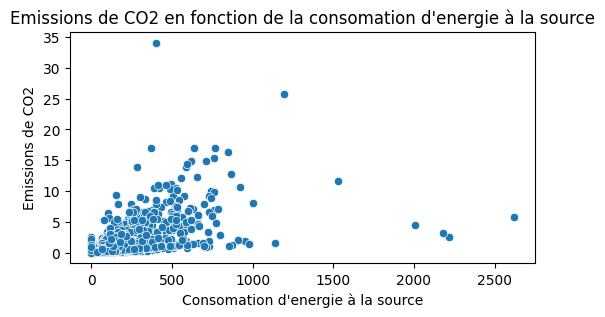

In [21]:
# plot des émission de CO2 en fonction de la consomation d'energie source
plt.figure(figsize=(6,3))
sns.scatterplot(x=conso_source, y=CO2_intensity)
plt.title('Emissions de CO2 en fonction de la consomation d\'energie à la source')
plt.xlabel('Consomation d\'energie à la source')
plt.ylabel('Emissions de CO2')
plt.show()

##### Distribution des Types d'Énergie
Nous visualisons les distributions de consommation pour différents types d'énergie : vapeur, électricité et gaz naturel.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


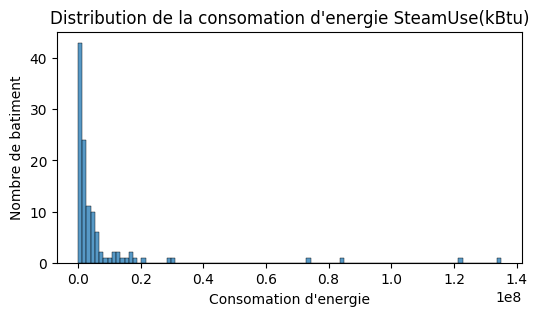

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


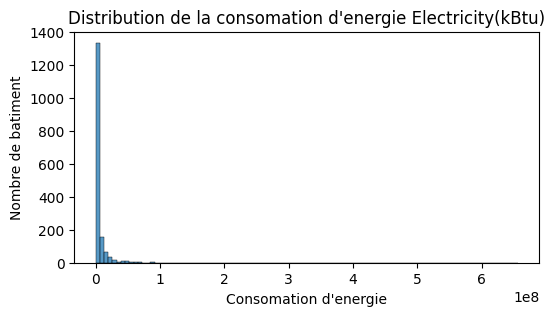

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


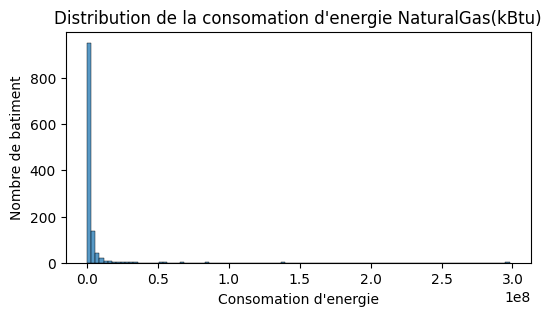

In [22]:
# distribution des 3 types d'energie sans les zéros
cols=['SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)']


for col in cols:
    plt.figure(figsize=(6,3))
    sns.histplot(cols_type_energy[col].loc[cols_type_energy[col] != 0], bins=100)
    plt.title('Distribution de la consomation d\'energie ' + col)
    plt.xlabel('Consomation d\'energie')
    plt.ylabel('Nombre de batiment')
    plt.show()

##### Classification par Source d'Énergie Dominante
Nous créons une variable catégorielle basée sur la source d'énergie dominante dans chaque bâtiment.

In [23]:
# Création d'une variable catégorielle basée sur les sources d'énergie
def categorie_energie(row):
    # Définir les différentes sources d'énergie et leurs consommations
    sources = [('Vapeur', row['SteamUse(kBtu)']), 
               ('Électricité', row['Electricity(kBtu)']), 
               ('GazNaturel', row['NaturalGas(kBtu)'])]
    
    # Trier les sources par leurs valeurs décroissantes
    sources_triees = sorted(sources, key=lambda x: x[1], reverse=True)
    
    # Si la source d'énergie la plus importante représente plus de 70% de la consommation totale,
    # on utilise cette source comme catégorie
    if sources_triees[0][1] > 0.7 * (row['SteamUse(kBtu)'] + row['Electricity(kBtu)'] + row['NaturalGas(kBtu)']):
        return sources_triees[0][0]
    
    # Si les deux principales sources d'énergie combinées représentent plus de 90% de la consommation totale,
    # on utilise ces deux sources comme catégorie
    elif sources_triees[0][1] + sources_triees[1][1] > 0.9 * (row['SteamUse(kBtu)'] + row['Electricity(kBtu)'] + row['NaturalGas(kBtu)']):
        return f"{sources_triees[0][0]} & {sources_triees[1][0]}"
    
    # Sinon, on considère que c'est un mélange des trois sources
    else:
        return "Mixte"

# Appliquer la fonction pour créer la nouvelle colonne
data_non_R['CategorieEnergie'] = data_non_R.apply(categorie_energie, axis=1)
distribution_categorie_energie = data_non_R['CategorieEnergie'].value_counts()
distribution_categorie_energie


CategorieEnergie
Électricité                 831
Électricité & GazNaturel    349
GazNaturel & Électricité    281
GazNaturel                  125
Électricité & Vapeur         32
Mixte                        29
Vapeur & Électricité         18
Vapeur                        3
Name: count, dtype: int64

<Axes: ylabel='count'>

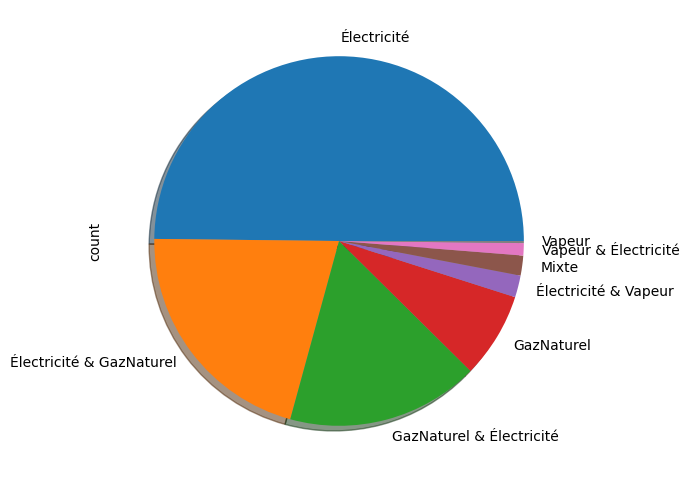

In [24]:
distribution_categorie_energie.plot.pie(figsize=(6,6), shadow=True, startangle=0)

Pour définir les catégories d'énergie, j'ai utilisé les seuils suivants :

1. Si une source d'énergie représente plus de 70% de la consommation totale, cette source est considérée comme dominante.
2. Si aucune source d'énergie ne dépasse ce seuil, mais que deux sources d'énergie sont présentes et que l'une d'elles est supérieure à 50%, alors ces deux sources d'énergie sont mentionnées avec la source la plus importante en premier. Par exemple, "Electricité & Gaz naturel" vs "Gaz naturel & Electricité".
3. Si aucune source d'énergie ne dépasse le seuil de 70% et que deux sources d'énergie ont des proportions assez équilibrées (ni l'une ni l'autre ne dépasse 50% de manière significative), alors la catégorie est étiquetée comme "Mixte".
4. Si seulement une source d'énergie est présente (et donc représente 100% de la consommation), elle est simplement étiquetée avec cette source d'énergie, comme "Electricité" ou "Vapeur".

Ces seuils ont été choisis de manière arbitraire pour illustrer une méthode de catégorisation basée sur la dominance relative des sources d'énergie.

##### Visualisation de la Consommation par Catégorie d'Énergie
Enfin, nous visualisons la relation entre consommation d'énergie sur site et à la source en fonction des catégories d'énergie.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

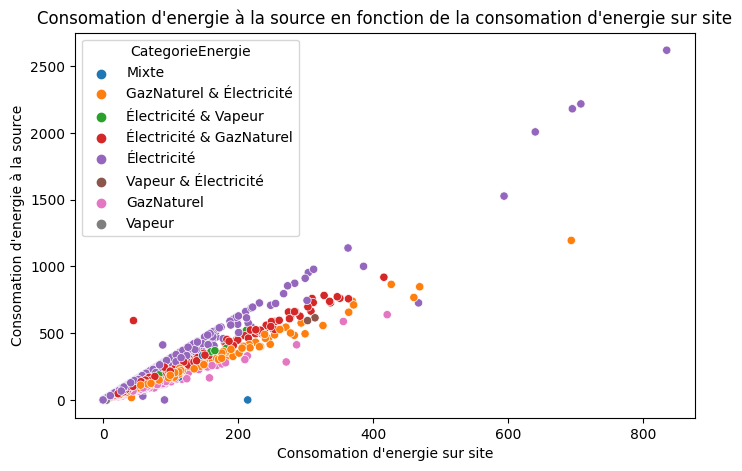

In [25]:
# plot de la consomation d'energie source en fonction de la consomation d'energie site avec la catégorie d'énergie en couleur
plt.figure(figsize=(8,5))
sns.scatterplot(x=conso_site, y=conso_source, hue=data_non_R['CategorieEnergie'])
plt.title('Consomation d\'energie à la source en fonction de la consomation d\'energie sur site')
plt.xlabel('Consomation d\'energie sur site')
plt.ylabel('Consomation d\'energie à la source')
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

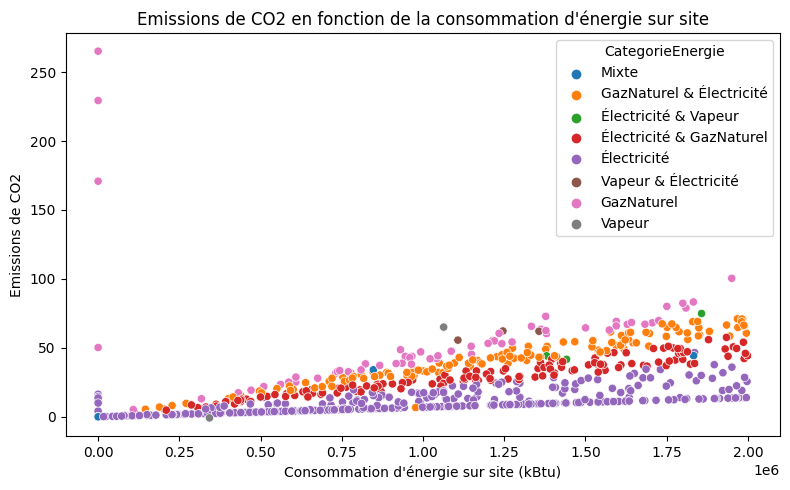

In [26]:
# Filtrer les données pour ne conserver que les observations 
filtered_data = data_non_R[data_non_R['SiteEnergyUse(kBtu)'] <= 2e6]

# Création du scatterplot avec les données filtrées
plt.figure(figsize=(8, 5))
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=filtered_data, hue=data_non_R['CategorieEnergie'])
plt.title("Emissions de CO2 en fonction de la consommation d'énergie sur site")
plt.xlabel('Consommation d\'énergie sur site (kBtu)')
plt.ylabel('Emissions de CO2')
plt.tight_layout()  # Ajustement automatique de la figure
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


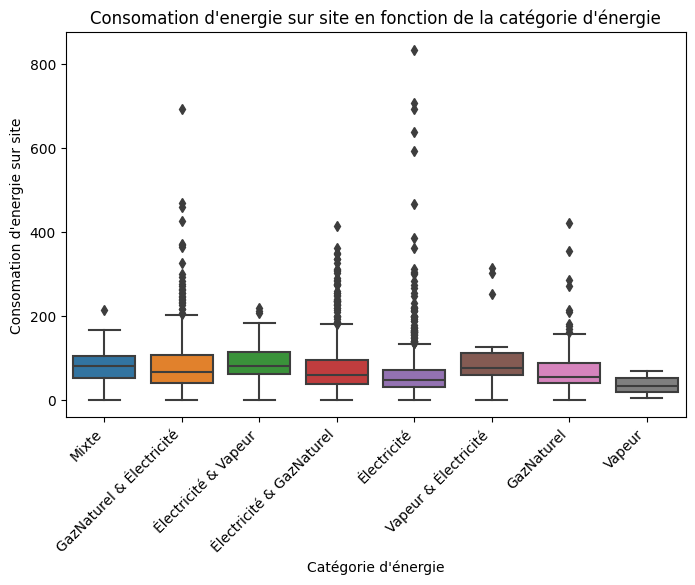

In [27]:
# boxplot de la consomation d'energie site en fonction de la catégorie d'énergie
plt.figure(figsize=(8,5))
sns.boxplot(x=data_non_R['CategorieEnergie'], y=conso_site)
plt.title('Consomation d\'energie sur site en fonction de la catégorie d\'énergie')
plt.xlabel('Catégorie d\'énergie')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Consomation d\'energie sur site')
plt.show()

### **2. Variables structurelles des bâtiments**

#### Variables Catégorielles

##### Transformation de la Variable 'Neighborhood' en Minuscule
Nous transformons toutes les valeurs de la variable 'Neighborhood' en minuscule pour garantir l'uniformité des données. Cela permet d'éviter les problèmes causés par des différences de casse dans les noms des quartiers.

In [28]:
# transformation de la variables 'Neighborhood' tout en minuscule
data_non_R['Neighborhood'] = data_non_R['Neighborhood'].str.lower()


##### Distribution des Types de Propriété Principale ('PrimaryPropertyType')
Nous visualisons la distribution des différents types de propriétés principales pour comprendre la composition de notre dataset. Cela nous aide à identifier les types de bâtiments les plus courants.

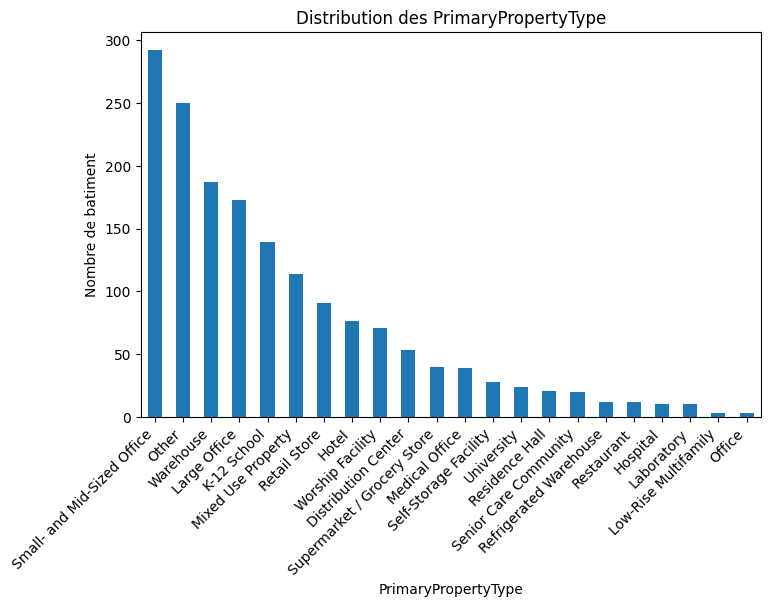

In [29]:
# distribution des PrimaryPropertyType
plt.figure(figsize=(8,5))
data_non_R['PrimaryPropertyType'].value_counts().plot.bar()
plt.title('Distribution des PrimaryPropertyType')
plt.xlabel('PrimaryPropertyType')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Nombre de batiment')
plt.show()

##### Répartition des Types de Propriétés par Quartier
Nous groupons les données par 'Neighborhood' et 'PrimaryPropertyType' pour visualiser la distribution des types de bâtiments dans chaque quartier. Cela nous permet de voir si certains types de bâtiments sont plus fréquents dans certains quartiers.

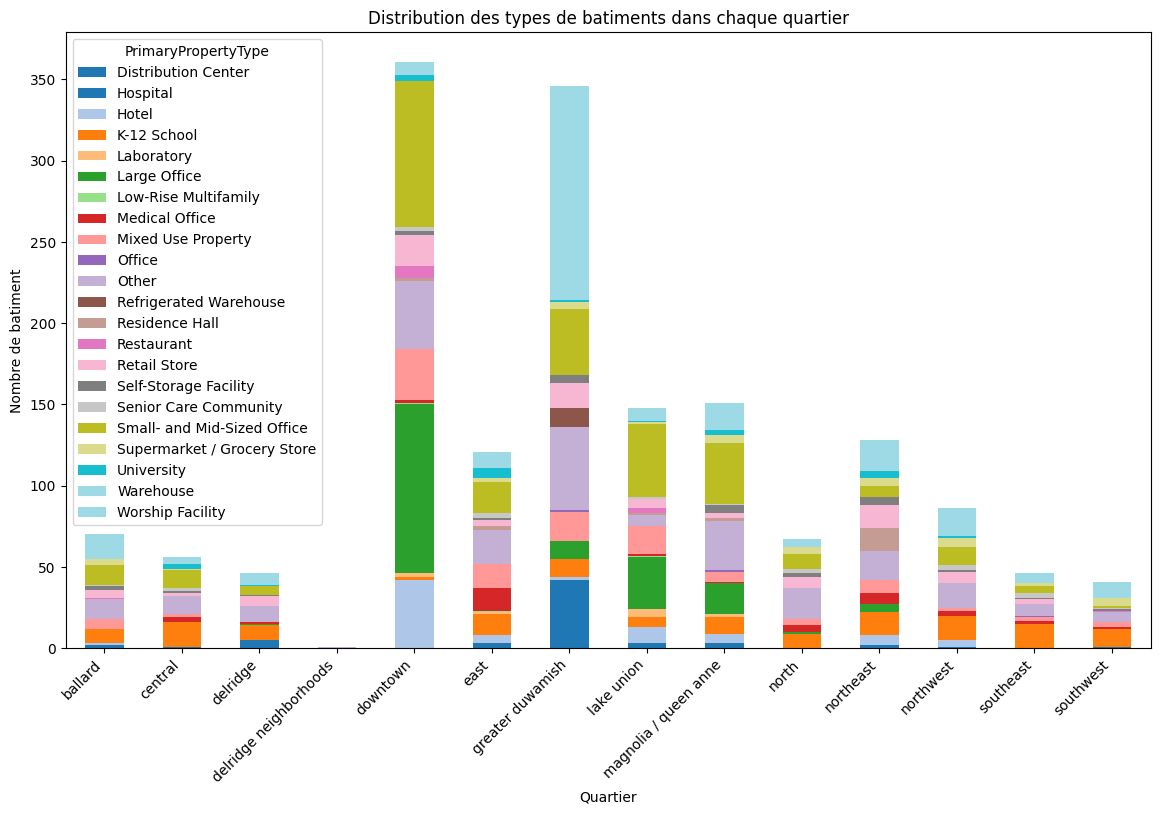

In [30]:
# Grouping by Neighborhood and PrimaryPropertyType to find the count of each property type in each neighborhood
neighborhood_property_counts = data_non_R.groupby(['Neighborhood', 'PrimaryPropertyType']).size().unstack()

# Plotting the distribution of property types in each neighborhood
fig, ax = plt.subplots(figsize=(14, 8))
neighborhood_property_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
ax.set_ylabel('Nombre de batiment')
ax.set_xlabel('Quartier')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution des types de batiments dans chaque quartier')
plt.show()


##### Visualisation des Corrélations
Nous utilisons des boxplots pour examiner les corrélations entre les quartiers et l'intensité des émissions de CO2, ainsi que entre les types de propriété principale et l'intensité des émissions de CO2. Cela nous aide à comprendre les variations de consommation d'énergie et d'émissions de CO2 en fonction de ces variables.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

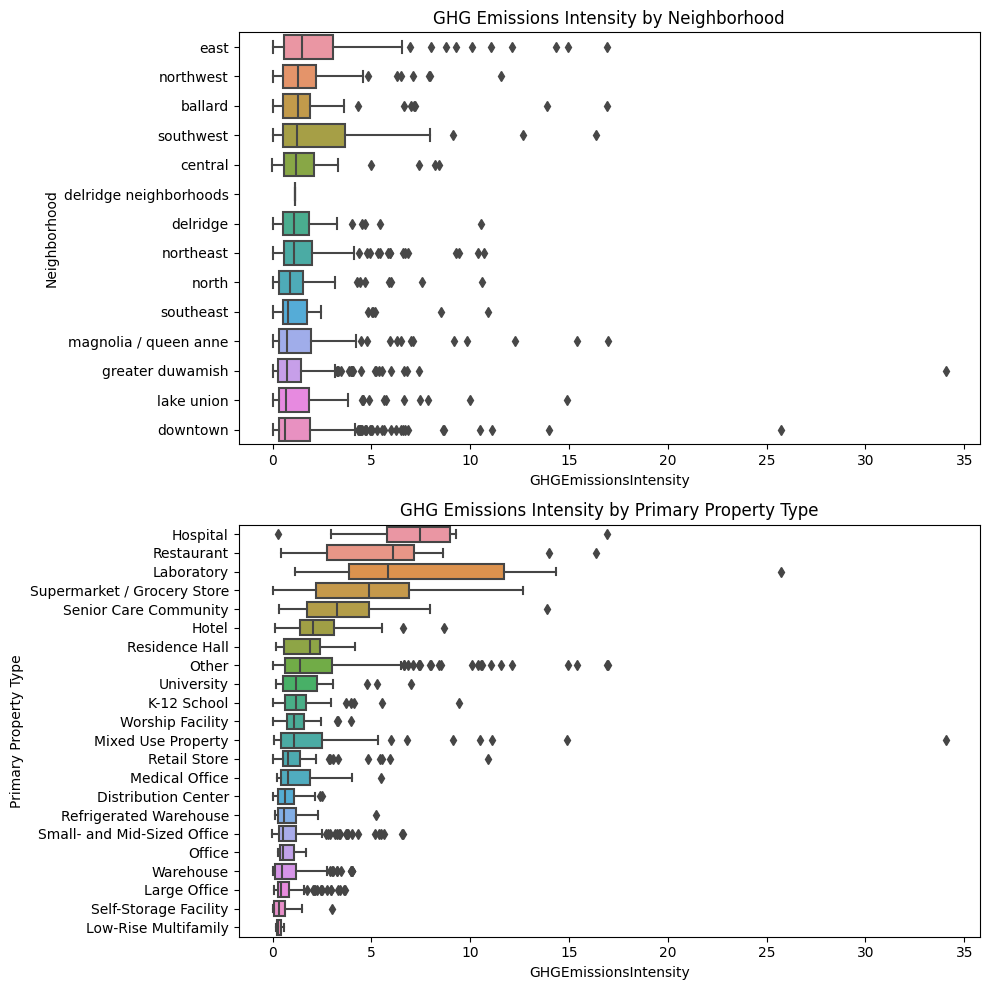

In [31]:
# Visualisation des correlations
data=data_non_R

fig, ax = plt.subplots(2, 1, figsize=(10,10))

# Boxplot des quartiers en fonction de l'émmission de CO2
sns.boxplot(data=data, y='Neighborhood', x='GHGEmissionsIntensity', order=data.groupby('Neighborhood')['GHGEmissionsIntensity'].median().sort_values(ascending=False).index, ax=ax[0])
ax[0].set_title('GHG Emissions Intensity by Neighborhood')
ax[0].set_xlabel('GHGEmissionsIntensity')
ax[0].set_ylabel('Neighborhood')

# Boxplot de PrimaryPropertyType en fonction de l'émmission de CO2
sns.boxplot(data=data, y='PrimaryPropertyType', x='GHGEmissionsIntensity', order=data.groupby('PrimaryPropertyType')['GHGEmissionsIntensity'].median().sort_values(ascending=False).index, ax=ax[1])
ax[1].set_title('GHG Emissions Intensity by Primary Property Type')
ax[1].set_xlabel('GHGEmissionsIntensity')
ax[1].set_ylabel('Primary Property Type')

plt.tight_layout()
plt.show()


c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

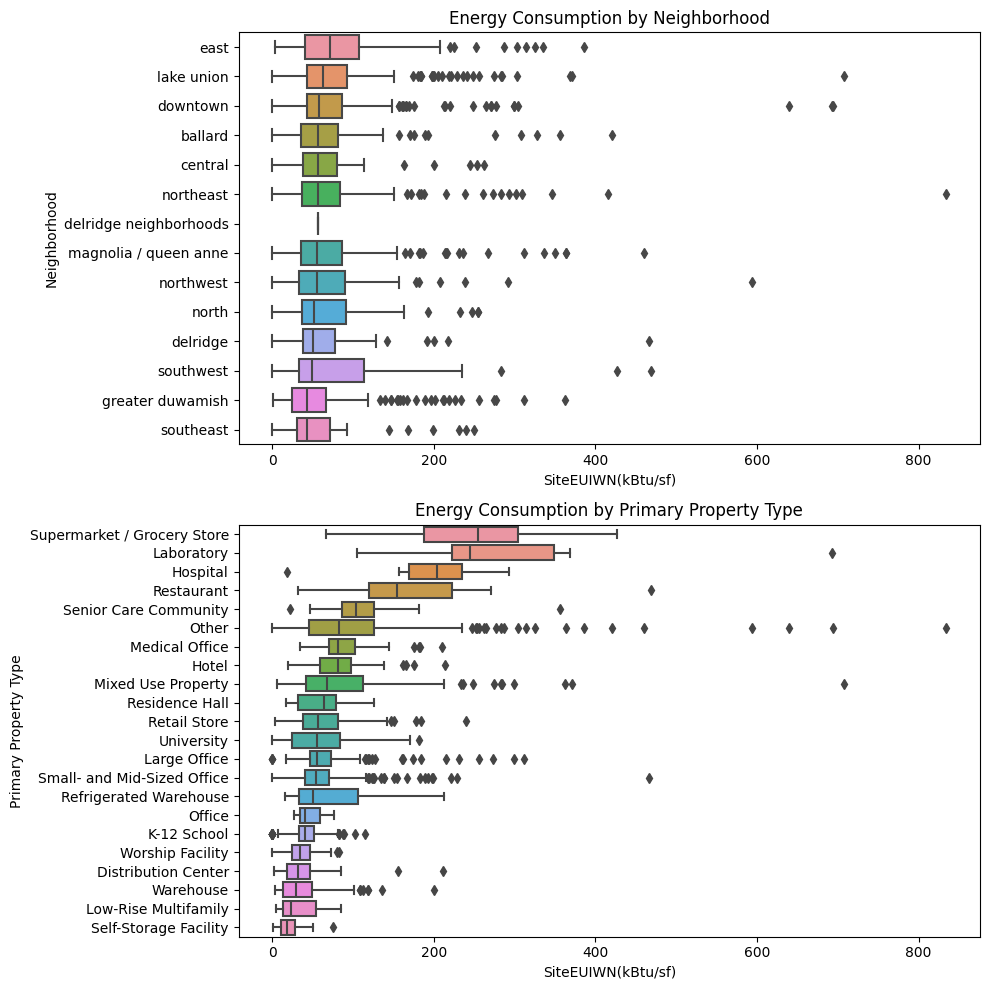

In [32]:
# Visualization of Energy Consumption (SiteEUIWN(kBtu/sf)) based on 'Neighborhood' and 'PrimaryPropertyType' using boxplots

fig, ax = plt.subplots(2, 1, figsize=(10,10))

# Boxplot for Neighborhood vs SiteEUIWN(kBtu/sf)
sns.boxplot(data=data, y='Neighborhood', x='SiteEUIWN(kBtu/sf)', order=data.groupby('Neighborhood')['SiteEUIWN(kBtu/sf)'].median().sort_values(ascending=False).index, ax=ax[0])
ax[0].set_title('Energy Consumption by Neighborhood')
ax[0].set_xlabel('SiteEUIWN(kBtu/sf)')
ax[0].set_ylabel('Neighborhood')

# Boxplot for PrimaryPropertyType vs SiteEUIWN(kBtu/sf)
sns.boxplot(data=data, y='PrimaryPropertyType', x='SiteEUIWN(kBtu/sf)', order=data.groupby('PrimaryPropertyType')['SiteEUIWN(kBtu/sf)'].median().sort_values(ascending=False).index, ax=ax[1])
ax[1].set_title('Energy Consumption by Primary Property Type')
ax[1].set_xlabel('SiteEUIWN(kBtu/sf)')
ax[1].set_ylabel('Primary Property Type')

plt.tight_layout()
plt.show()


#### Visualisation des types d'usage des batiments

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

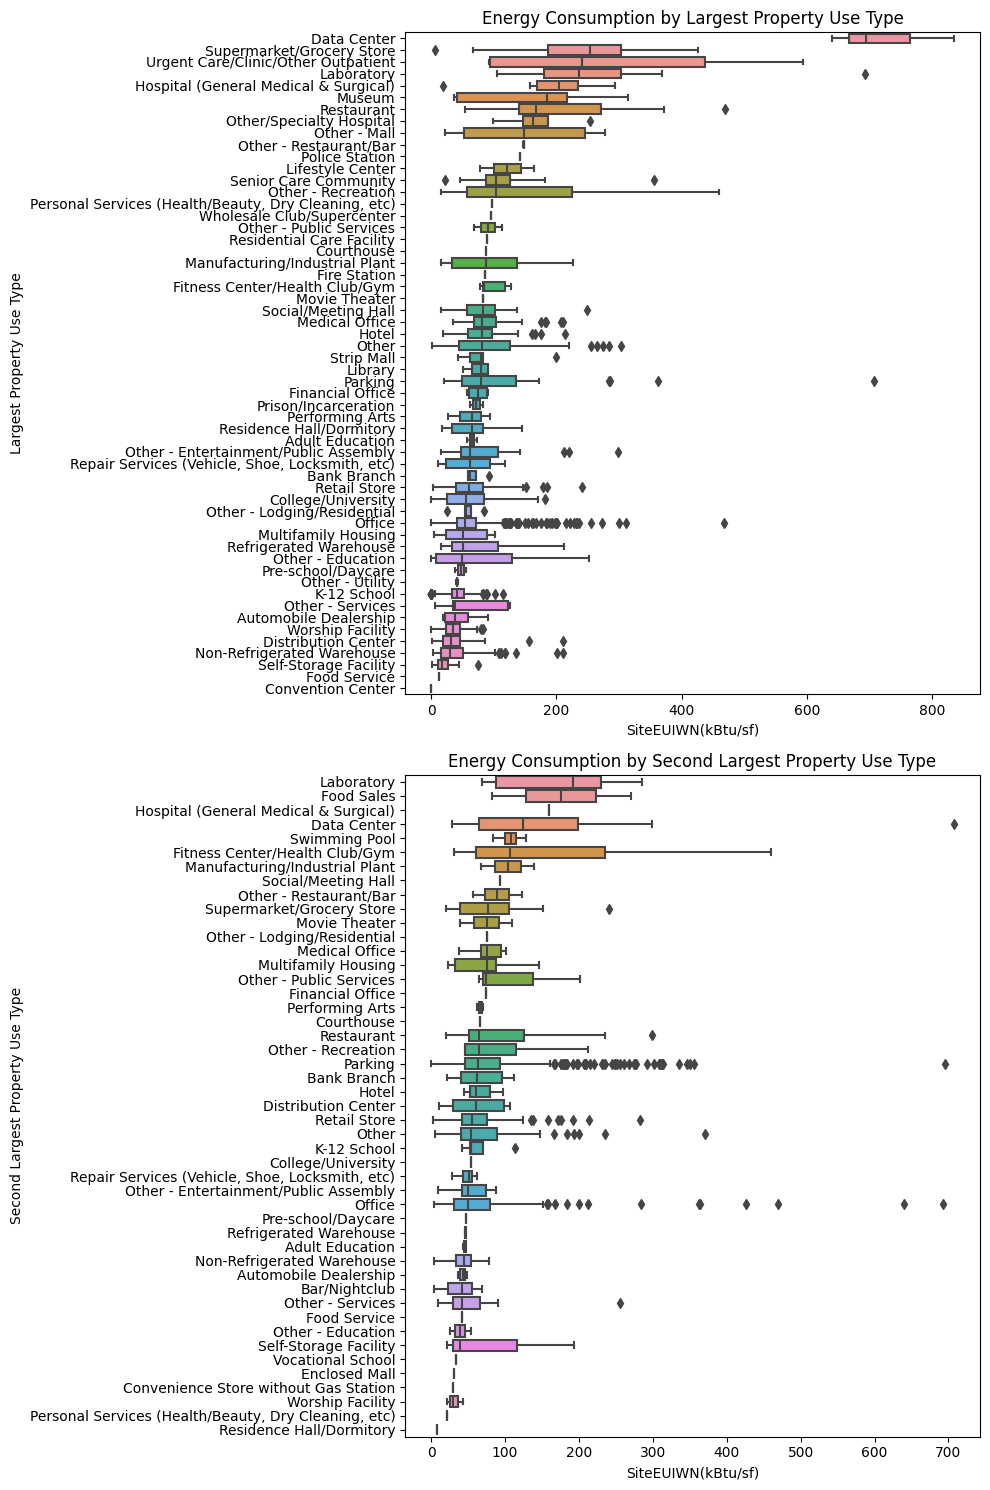

In [33]:
# Visualization of energy consumption based on property use types using boxplots
data=data_non_R
fig, ax = plt.subplots(2, 1, figsize=(10,15))

# Boxplot for LargestPropertyUseType vs SiteEUIWN(kBtu/sf)
sns.boxplot(data=data, y='LargestPropertyUseType', x='SiteEUIWN(kBtu/sf)', order=data.groupby('LargestPropertyUseType')['SiteEUIWN(kBtu/sf)'].median().sort_values(ascending=False).index, ax=ax[0])
ax[0].set_title('Energy Consumption by Largest Property Use Type')
ax[0].set_xlabel('SiteEUIWN(kBtu/sf)')
ax[0].set_ylabel('Largest Property Use Type')

# Boxplot for SecondLargestPropertyUseType vs SiteEUIWN(kBtu/sf)
sns.boxplot(data=data, y='SecondLargestPropertyUseType', x='SiteEUIWN(kBtu/sf)', order=data.groupby('SecondLargestPropertyUseType')['SiteEUIWN(kBtu/sf)'].median().sort_values(ascending=False).index, ax=ax[1])
ax[1].set_title('Energy Consumption by Second Largest Property Use Type')
ax[1].set_xlabel('SiteEUIWN(kBtu/sf)')
ax[1].set_ylabel('Second Largest Property Use Type')

plt.tight_layout()
plt.show()


c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

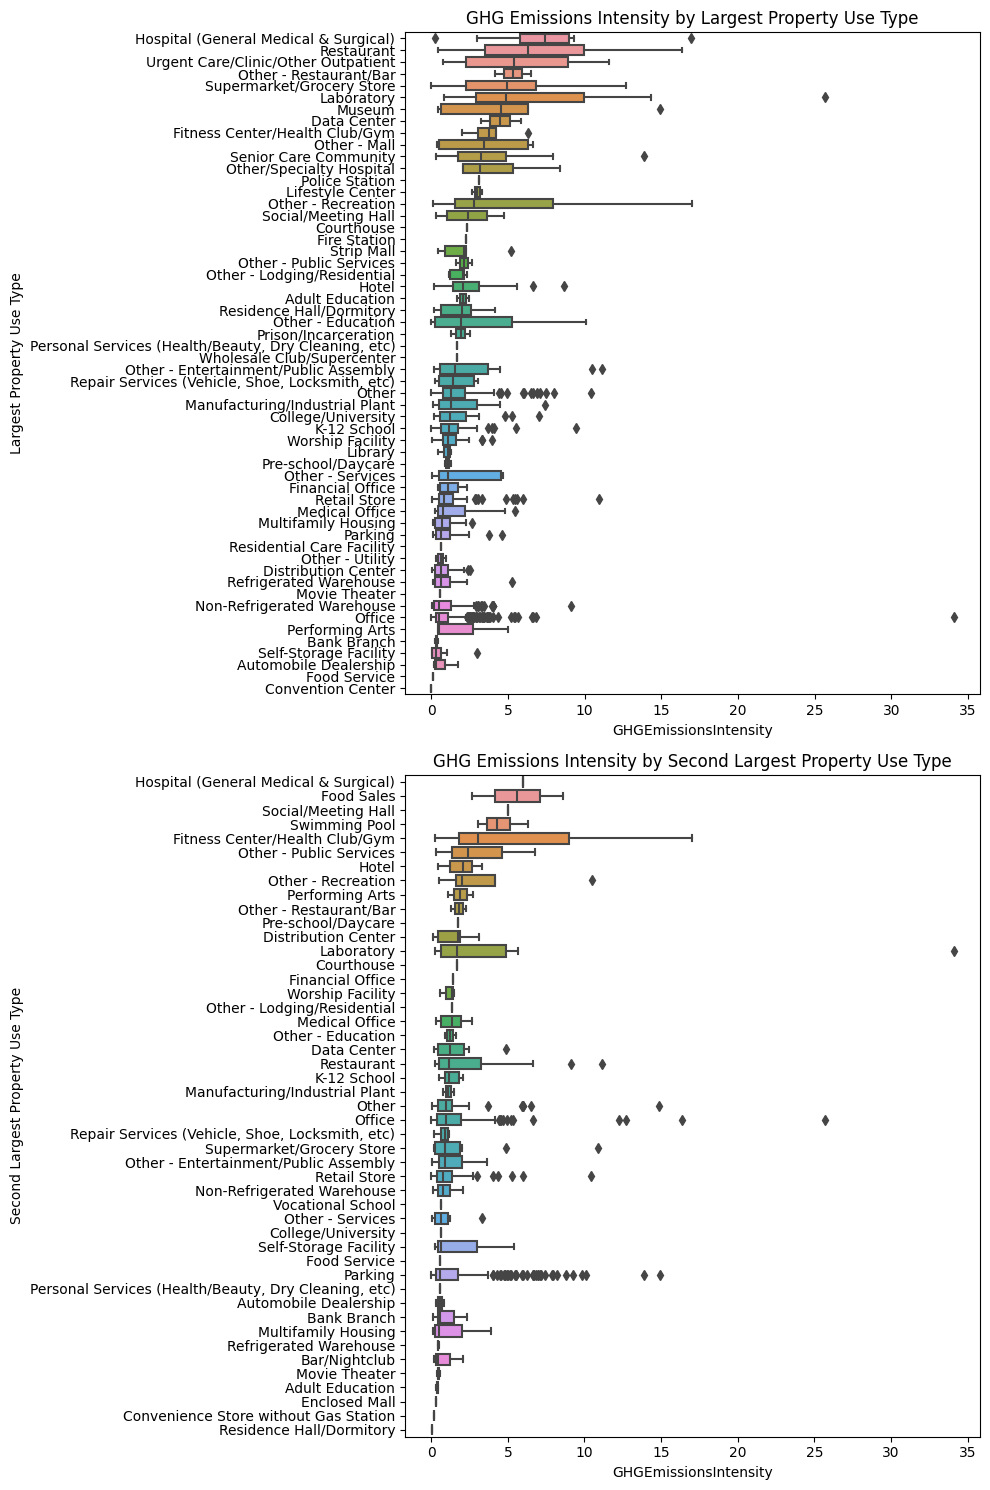

In [34]:
# Visualization of GHG Emissions Intensity based on property use types using boxplots

fig, ax = plt.subplots(2, 1, figsize=(10,15))

# Boxplot for LargestPropertyUseType vs GHGEmissionsIntensity
sns.boxplot(data=data, y='LargestPropertyUseType', x='GHGEmissionsIntensity', order=data.groupby('LargestPropertyUseType')['GHGEmissionsIntensity'].median().sort_values(ascending=False).index, ax=ax[0])
ax[0].set_title('GHG Emissions Intensity by Largest Property Use Type')
ax[0].set_xlabel('GHGEmissionsIntensity')
ax[0].set_ylabel('Largest Property Use Type')

# Boxplot for SecondLargestPropertyUseType vs GHGEmissionsIntensity
sns.boxplot(data=data, y='SecondLargestPropertyUseType', x='GHGEmissionsIntensity', order=data.groupby('SecondLargestPropertyUseType')['GHGEmissionsIntensity'].median().sort_values(ascending=False).index, ax=ax[1])
ax[1].set_title('GHG Emissions Intensity by Second Largest Property Use Type')
ax[1].set_xlabel('GHGEmissionsIntensity')
ax[1].set_ylabel('Second Largest Property Use Type')

plt.tight_layout()
plt.show()


In [35]:
# liste des catégories 'LargestPropertyUseType' avec des médianes d'GHGEmissionsIntensity élévées
data_non_R.groupby('LargestPropertyUseType')['SiteEUIWN(kBtu/sf)'].median().sort_values(ascending=False).index

Index(['Data Center', 'Supermarket/Grocery Store',
       'Urgent Care/Clinic/Other Outpatient', 'Laboratory',
       'Hospital (General Medical & Surgical)', 'Museum', 'Restaurant',
       'Other/Specialty Hospital', 'Other - Mall', 'Other - Restaurant/Bar',
       'Police Station', 'Lifestyle Center', 'Senior Care Community',
       'Other - Recreation',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Wholesale Club/Supercenter', 'Other - Public Services',
       'Residential Care Facility', 'Courthouse',
       'Manufacturing/Industrial Plant', 'Fire Station',
       'Fitness Center/Health Club/Gym', 'Movie Theater',
       'Social/Meeting Hall', 'Medical Office', 'Hotel', 'Other', 'Strip Mall',
       'Library', 'Parking', 'Financial Office', 'Prison/Incarceration',
       'Performing Arts', 'Residence Hall/Dormitory', 'Adult Education',
       'Other - Entertainment/Public Assembly',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Bank Branch',
  

In [36]:
# création d'une varible avec 3 catégories de 'LargestPropertyUseType'
# création des catégories
LPUT_HighGHG = ['Data Center', 'Supermarket/Grocery Store',
       'Urgent Care/Clinic/Other Outpatient', 'Laboratory',
       'Hospital (General Medical & Surgical)', 'Museum', 'Restaurant',
       'Other/Specialty Hospital', 'Other - Mall', 'Other - Restaurant/Bar',
       'Police Station', 'Lifestyle Center', 'Senior Care Community',
       'Other - Recreation']

LPUT_MediumGHG = ['Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Wholesale Club/Supercenter', 'Other - Public Services',
       'Residential Care Facility', 'Courthouse',
       'Manufacturing/Industrial Plant', 'Fire Station',
       'Fitness Center/Health Club/Gym', 'Movie Theater',
       'Social/Meeting Hall', 'Medical Office', 'Hotel', 'Other', 'Strip Mall',
       'Library', 'Parking', 'Financial Office', 'Prison/Incarceration',
       'Performing Arts', 'Residence Hall/Dormitory', 'Adult Education',
       'Other - Entertainment/Public Assembly',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Bank Branch',
       'Retail Store', 'College/University', 'Other - Lodging/Residential',
       'Office', 'Multifamily Housing', 'Refrigerated Warehouse']
    
LPUT_LowGHG = ['Other - Education', 'Pre-school/Daycare', 'Other - Utility',
       'K-12 School', 'Other - Services', 'Automobile Dealership',
       'Worship Facility', 'Distribution Center', 'Non-Refrigerated Warehouse',
       'Self-Storage Facility', 'Food Service', 'Convention Center']

# fonction pour créer la variable
def create_LPUT_category(row):
    if row['LargestPropertyUseType'] in LPUT_HighGHG:
        return 'High'
    elif row['LargestPropertyUseType'] in LPUT_MediumGHG:
        return 'Medium'
    elif row['LargestPropertyUseType'] in LPUT_LowGHG:
        return 'Low'
    else:
        return 'Other'
    
# création de la variable
data_non_R.loc[:, 'LPUT'] = data_non_R.apply(create_LPUT_category, axis=1)

In [37]:
# liste des catégories 'SecondLargestPropertyUseType' avec des médianes d'GHGEmissionsIntensity élévées
data_non_R.groupby('SecondLargestPropertyUseType')['SiteEUIWN(kBtu/sf)'].median().sort_values(ascending=False).index

Index(['Laboratory', 'Food Sales', 'Hospital (General Medical & Surgical)',
       'Data Center', 'Swimming Pool', 'Fitness Center/Health Club/Gym',
       'Manufacturing/Industrial Plant', 'Social/Meeting Hall',
       'Other - Restaurant/Bar', 'Supermarket/Grocery Store', 'Movie Theater',
       'Other - Lodging/Residential', 'Medical Office', 'Multifamily Housing',
       'Other - Public Services', 'Financial Office', 'Performing Arts',
       'Courthouse', 'Restaurant', 'Other - Recreation', 'Parking',
       'Bank Branch', 'Hotel', 'Distribution Center', 'Retail Store', 'Other',
       'K-12 School', 'College/University',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Entertainment/Public Assembly', 'Office', 'Pre-school/Daycare',
       'Refrigerated Warehouse', 'Adult Education',
       'Non-Refrigerated Warehouse', 'Automobile Dealership', 'Bar/Nightclub',
       'Other - Services', 'Food Service', 'Other - Education',
       'Self-Storage Facility', 

In [38]:
# création d'une varible avec 3 catégories de 'SecondLargestPropertyUseType'
# création des catégories
SLPUT_HighGHG = ['Laboratory', 'Food Sales', 'Hospital (General Medical & Surgical)',
       'Data Center', 'Swimming Pool', 'Fitness Center/Health Club/Gym',
       'Manufacturing/Industrial Plant', 'Social/Meeting Hall',
       'Other - Restaurant/Bar', 'Supermarket/Grocery Store']

SLPUT_MediumGHG = ['Movie Theater',
       'Other - Lodging/Residential', 'Medical Office', 'Multifamily Housing',
       'Other - Public Services', 'Financial Office', 'Performing Arts',
       'Courthouse', 'Restaurant', 'Other - Recreation', 'Parking',
       'Bank Branch', 'Hotel', 'Distribution Center', 'Retail Store', 'Other',
       'K-12 School', 'College/University',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Entertainment/Public Assembly', 'Office', 'Pre-school/Daycare',
       'Refrigerated Warehouse', 'Adult Education',
       'Non-Refrigerated Warehouse', 'Automobile Dealership', 'Bar/Nightclub',
       'Other - Services', 'Food Service', 'Other - Education',
       'Self-Storage Facility']

SLPUT_LowGHG = ['Vocational School', 'Enclosed Mall',
       'Convenience Store without Gas Station', 'Worship Facility',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Residence Hall/Dormitory']


# fonction pour créer la variable
def create_SLPUT_category(row):
    if row['SecondLargestPropertyUseType'] in SLPUT_HighGHG:
        return 'High'
    elif row['SecondLargestPropertyUseType'] in SLPUT_MediumGHG:
        return 'Medium'
    elif row['SecondLargestPropertyUseType'] in SLPUT_LowGHG:
        return 'Low'
    else:
        return 'Other'

# création de la variable
data_non_R.loc[:, 'SLPUT'] = data_non_R.apply(create_LPUT_category, axis=1)

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

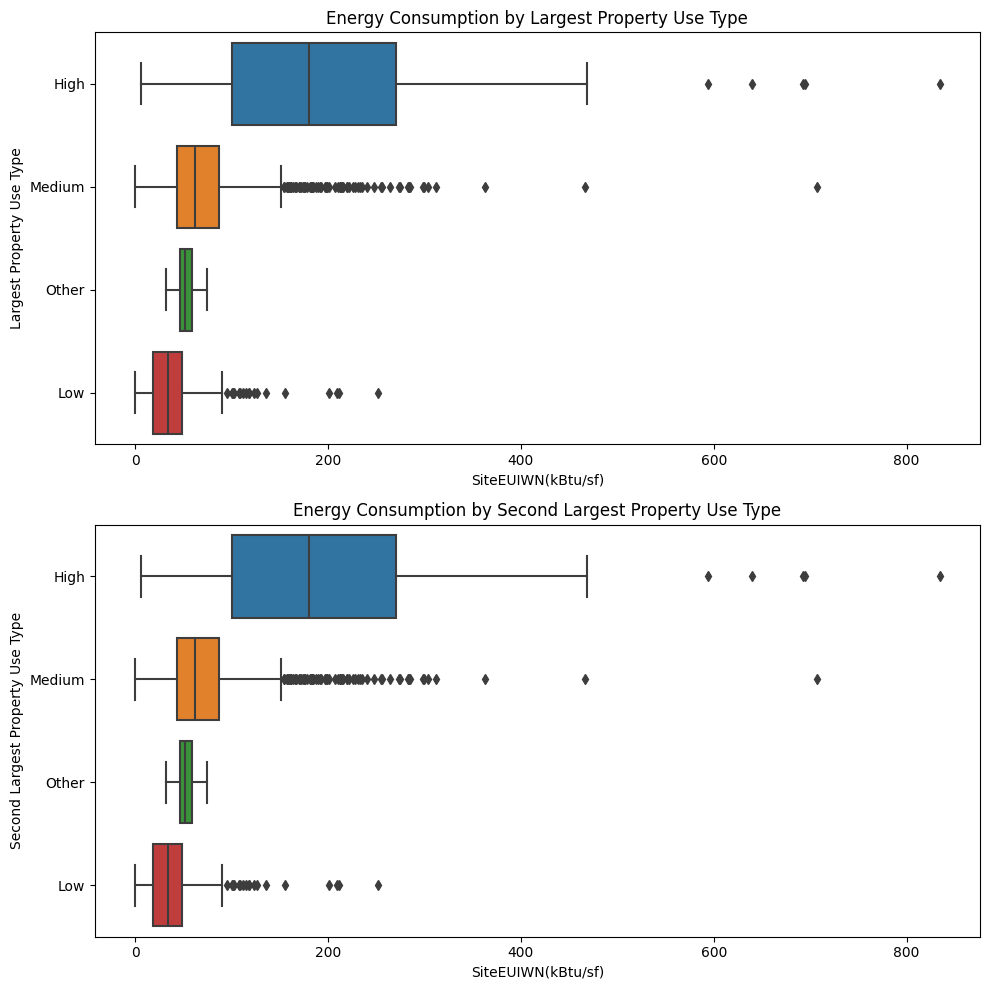

In [39]:
# boxplot des nouvelles variables
fig, ax = plt.subplots(2, 1, figsize=(10,10))

# Boxplot for LPUT vs SiteEUIWN(kBtu/sf)
sns.boxplot(data=data_non_R, y='LPUT', x='SiteEUIWN(kBtu/sf)', order=data_non_R.groupby('LPUT')['SiteEUIWN(kBtu/sf)'].median().sort_values(ascending=False).index, ax=ax[0])
ax[0].set_title('Energy Consumption by Largest Property Use Type')
ax[0].set_xlabel('SiteEUIWN(kBtu/sf)')
ax[0].set_ylabel('Largest Property Use Type')

# Boxplot for SLPUT vs SiteEUIWN(kBtu/sf)
sns.boxplot(data=data_non_R, y='SLPUT', x='SiteEUIWN(kBtu/sf)', order=data_non_R.groupby('SLPUT')['SiteEUIWN(kBtu/sf)'].median().sort_values(ascending=False).index, ax=ax[1])
ax[1].set_title('Energy Consumption by Second Largest Property Use Type')
ax[1].set_xlabel('SiteEUIWN(kBtu/sf)')
ax[1].set_ylabel('Second Largest Property Use Type')

plt.tight_layout()
plt.show()

#### Variables Structurelles Numériques

##### Distribution de l'Année de Construction
Nous visualisons la distribution des années de construction pour comprendre l'âge des bâtiments dans notre dataset. Cela peut avoir un impact sur la consommation d'énergie et les émissions de CO2.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


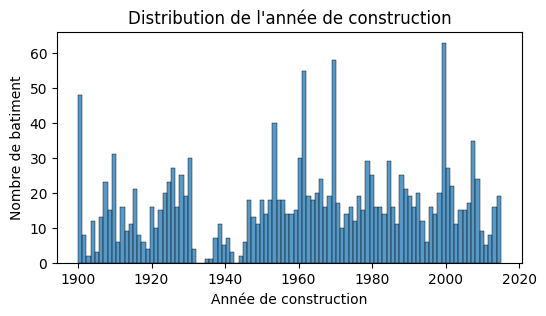

In [40]:
# distrribution des YearBuilt
plt.figure(figsize=(6,3))
sns.histplot(data_non_R['YearBuilt'], bins=100)
plt.title('Distribution de l\'année de construction')
plt.xlabel('Année de construction')
plt.ylabel('Nombre de batiment')
plt.show()

##### Relation entre l'Année de Construction et les variables cibles
Nous explorons la relation entre l'année de construction des bâtiments et les variables cobles. Cela nous aide à voir si les bâtiments plus anciens montrent une consommation supérieure aux batiments récents.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


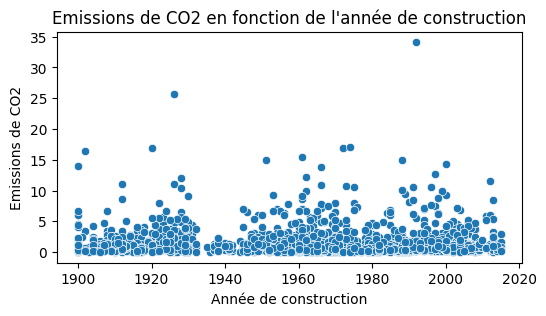

In [41]:
# relation yearbuilt et GHGEmissionsIntensity
plt.figure(figsize=(6,3))
sns.scatterplot(x=data_non_R['YearBuilt'], y=data_non_R['GHGEmissionsIntensity'])
plt.title('Emissions de CO2 en fonction de l\'année de construction')
plt.xlabel('Année de construction')
plt.ylabel('Emissions de CO2')
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

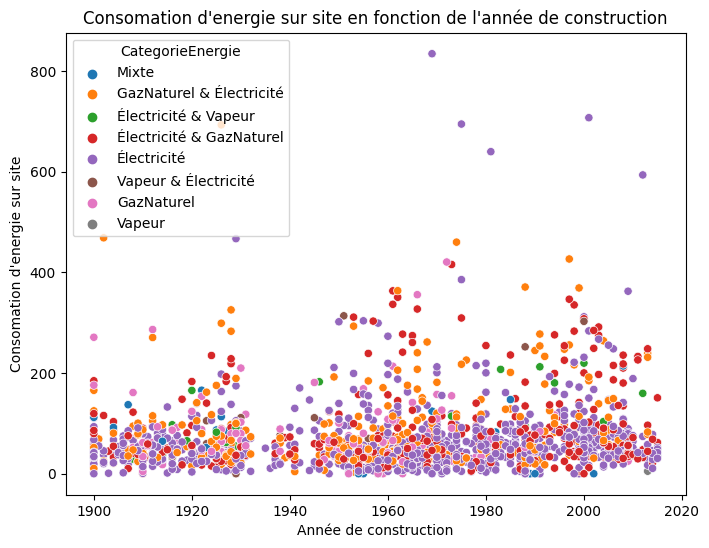

In [42]:
# relation yearbuilt et SiteEUIWN(kBtu/sf)
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_non_R['YearBuilt'], y=data_non_R['SiteEUIWN(kBtu/sf)'],hue=data_non_R['CategorieEnergie'])
plt.title('Consomation d\'energie sur site en fonction de l\'année de construction')
plt.xlabel('Année de construction')
plt.ylabel('Consomation d\'energie sur site')
plt.show()

#### Superficie et Hauteur des Bâtiments

##### Distribution des Superficies
Nous visualisons la distribution des superficies totales des bâtiments. Cela nous permet de comprendre la taille des bâtiments dans notre dataset et de détecter les valeurs aberrantes.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


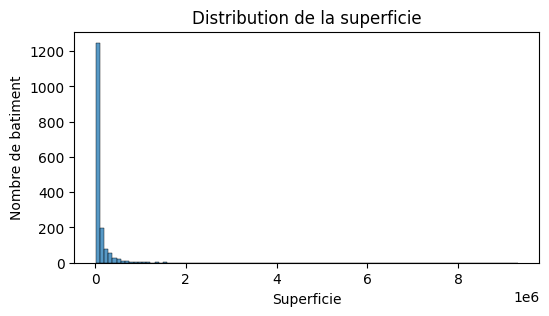

In [43]:
# distribution des superficies
plt.figure(figsize=(6,3))
sns.histplot(data_non_R['PropertyGFATotal'], bins=100)
plt.title('Distribution de la superficie')
plt.xlabel('Superficie')
plt.ylabel('Nombre de batiment')
plt.show()

Beaucoup de petites superficiees

##### Relation entre la Superficie et la Consommation d'Énergie
Nous explorons la relation entre la superficie totale des bâtiments et leur consommation d'énergie par pied carré. Les graphiques montrent comment la consommation d'énergie varie en fonction de la taille des bâtiments.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

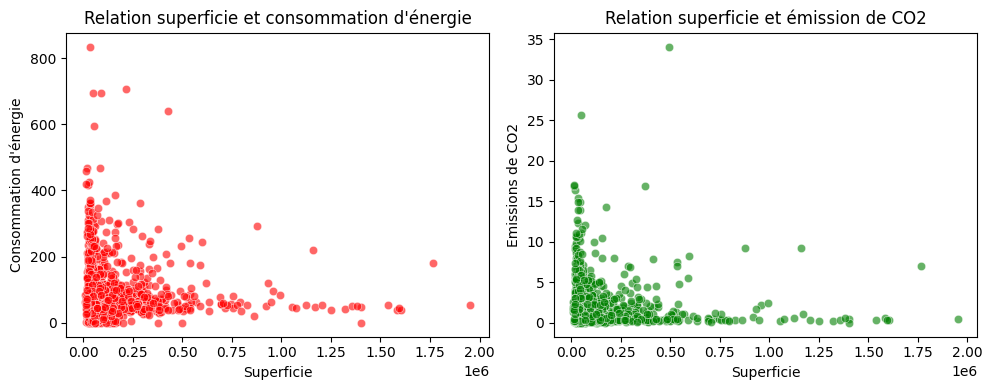

In [44]:
# filtre superficie inférieur à 2e6
df= data_non_R[data_non_R['PropertyGFATotal'] < 2e6]

# Plotting the relationship between PropertyGFATotal and SiteEnergyUseWN(kBtu/sf) - Energy consumption per square foot
plt.figure(figsize=(10,4))

# Energy Consumption per square foot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PropertyGFATotal', y='SiteEUIWN(kBtu/sf)', alpha=0.6, color='red')
plt.title('Relation superficie et consommation d\'énergie')
plt.xlabel('Superficie')
plt.ylabel('Consommation d\'énergie')
           
# GHG Emissions Intensity
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PropertyGFATotal', y='GHGEmissionsIntensity', alpha=0.6, color='green')
plt.title('Relation superficie et émission de CO2')
plt.xlabel('Superficie')
plt.ylabel('Emissions de CO2')

plt.tight_layout()
plt.show()


Il est étonnant de constater que les bâtiments plus grands ont une intensité d'émissions de CO2 et une consomation plus faible au mètre carré

##### Relation entre le Nombre d'Étages et la Consommation d'Énergie
Nous examinons la relation entre le nombre d'étages des bâtiments et leur consommation d'énergie par pied carré, ainsi que l'intensité des émissions de CO2. Cela nous aide à comprendre si les bâtiments plus hauts consomment plus ou moins d'énergie par pied carré.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

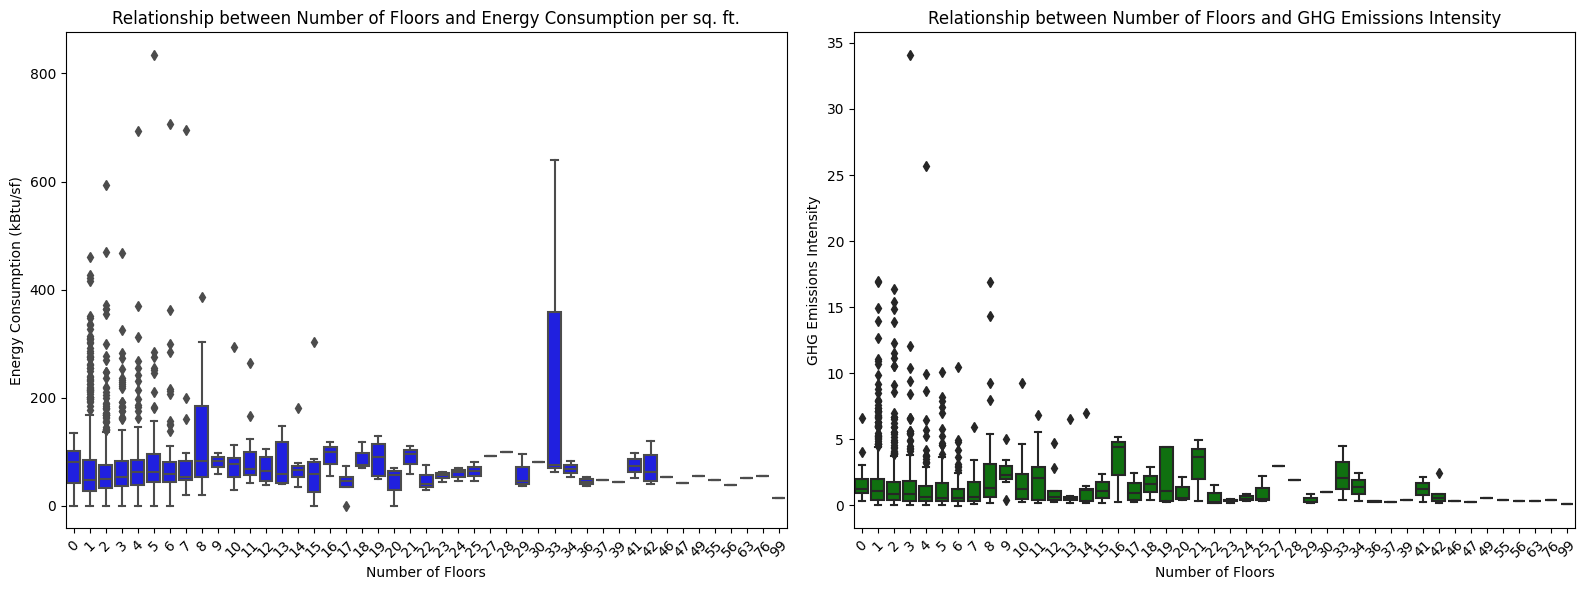

In [45]:
data=data_non_R
# Plotting the relationship between NumberofFloors and SiteEnergyUseWN(kBtu/sf) & GHGEmissionsIntensity
plt.figure(figsize=(16, 6))

# Energy Consumption per square foot
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='NumberofFloors', y='SiteEUIWN(kBtu/sf)', color='blue')
plt.title('Relationship between Number of Floors and Energy Consumption per sq. ft.')
plt.xlabel('Number of Floors')
plt.ylabel('Energy Consumption (kBtu/sf)')
plt.xticks(rotation=45)

# GHG Emissions Intensity
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='NumberofFloors', y='GHGEmissionsIntensity', color='green')
plt.title('Relationship between Number of Floors and GHG Emissions Intensity')
plt.xlabel('Number of Floors')
plt.ylabel('GHG Emissions Intensity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [46]:
# affiochage des batiment avec 33 étages
data_non_R[data_non_R['NumberofFloors'] == 33]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
13              18      2016  NonResidential               Hotel   
206            328      2016  NonResidential        Large Office   
558            753      2016  NonResidential               Other   

                   PropertyName       Address     City State  ZipCode  \
13   Crowne Plaza Hotel Seattle  1113 6th Ave  Seattle    WA  98101.0   
206                1600 Seventh  1600 7th Ave  Seattle    WA  98191.0   
558              WestinBuilding  2001 6th Ave  Seattle    WA  98121.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
13                     0942000235                    7     downtown  47.60809   
206                    0659000165                    7     downtown  47.61316   
558                    0659000950                    7     downtown  47.61438   

     Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
13  -122.33212       1980                1.0              33   
206 -122.33430       1976                1.0              33   
558 -122.33871       1981                1.0              33   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
13             315952               57600                  258352   
206            791396                   0                  791396   
558            429405                   0                  429405   

                             ListOfAllPropertyUseTypes LargestPropertyUseType  \
13                                      Hotel, Parking                  Hotel   
206  Lifestyle Center, Office, Other, Parking, Rest...                 Office   
558                                Data Center, Office            Data Center   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
13                    295511.0                      Parking   
206                   622034.0                      Parking   
558                   218997.0                       Office   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
13                           57600.0                         NaN   
206                         132465.0                       Other   
558                         210409.0                         NaN   

     ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
13                              NaN                      NaN             58.0   
206                         33110.0                 20172015             89.0   
558                             NaN                      NaN             98.0   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
13          75.500000           76.199997          179.899994   
206         60.299999           62.400002          189.500000   
558        639.700012          639.799988         2007.900024   

     SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
13             180.699997           22325364.0             22524948.0   
206            195.899994           40847752.0             42227404.0   
558           2008.000000          274682208.0            274725984.0   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
13        4337738.5         4075083.0         13904183.0        40834.398440   
206             0.0        11969413.0         40839637.0         5382.505371   
558             0.0        80460872.0        274532495.0         1496.720215   

     NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
13          4083440.0        False       NaN        Compliant     NaN   
206          538251.0        False       NaN        Compliant     NaN   
558          149672.0        False       NaN        Compliant     NaN   

     TotalGHGEmissions  GHGEmissionsIntensity CategoryGroup CategorieEnergie  \
13              648.62                   2.05             0            Mixte   
206             313.30                   0.40             0      Électricité

In [47]:
# Vérifiez si vous avez des valeurs zéro dans `NumberofFloors`
zero_floors = (data_non_R['NumberofFloors'] == 0).sum()
print(f"Nombre de bâtiments avec zéro étage : {zero_floors}")

# afficher les ligne des bâtimens avec 0 étage
#data_non_R[data_non_R['NumberofFloors'] == 0]

Nombre de bâtiments avec zéro étage : 16


##### Superficie par Étage
Pour les bâtiments avec des valeurs de 'NumberofFloors' égales à zéro, nous remplaçons ces valeurs par un, puis recalculons la superficie par étage. Nous vérifions les statistiques descriptives pour nous assurer qu'il n'y a pas de valeurs infinies.

In [48]:
# Remplacez les valeurs zéro par 1 ou par une valeur appropriée
data_non_R['NumberofFloors'] = data_non_R['NumberofFloors'].replace(0, 1)

# Recalculez `SuperficieParEtage`
data_non_R['SuperficieParEtage'] = data_non_R['PropertyGFABuilding(s)'] / data_non_R['NumberofFloors']

# Vérifiez à nouveau la statistique descriptive pour confirmer qu'il n'y a plus de valeurs infinies
print(data_non_R['SuperficieParEtage'].describe())


count    1.668000e+03
mean     3.984343e+04
std      2.352345e+05
min      2.216970e+02
25%      1.235629e+04
50%      2.119500e+04
75%      3.433333e+04
max      9.320156e+06
Name: SuperficieParEtage, dtype: float64


In [49]:
# description de la variable SuperficieParEtage
data_non_R['SuperficieParEtage'].describe()

count    1.668000e+03
mean     3.984343e+04
std      2.352345e+05
min      2.216970e+02
25%      1.235629e+04
50%      2.119500e+04
75%      3.433333e+04
max      9.320156e+06
Name: SuperficieParEtage, dtype: float64

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


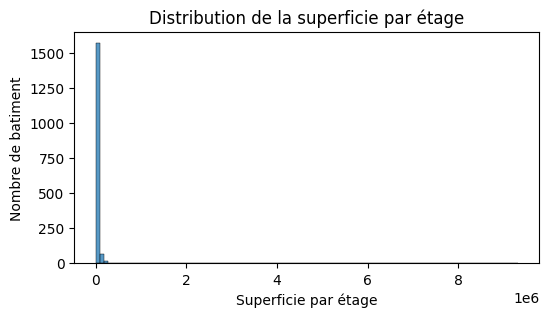

In [50]:
# distribution de la superficie par étage
plt.figure(figsize=(6,3))
sns.histplot(data_non_R['SuperficieParEtage'], bins=100)
plt.title('Distribution de la superficie par étage')
plt.xlabel('Superficie par étage')
plt.ylabel('Nombre de batiment')
plt.show()

#### Localisation

##### Distribution de la Longitude et de la Latitude
Nous visualisons la distribution des valeurs de longitude et de latitude pour comprendre la répartition géographique des bâtiments dans notre dataset.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


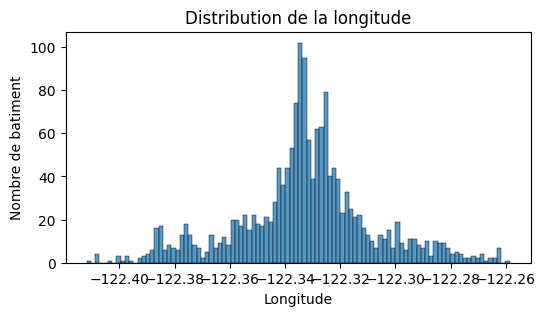

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


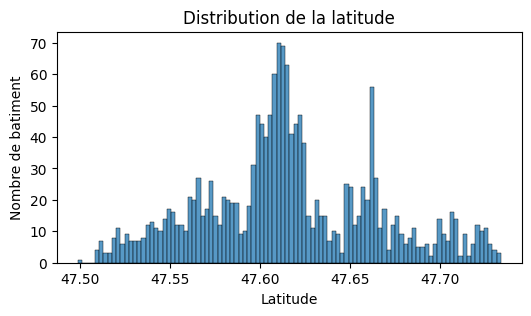

In [51]:
# distribution de longituide et latitude
plt.figure(figsize=(6,3))
sns.histplot(data_non_R['Longitude'], bins=100)
plt.title('Distribution de la longitude')
plt.xlabel('Longitude')
plt.ylabel('Nombre de batiment')
plt.show()

plt.figure(figsize=(6,3))
sns.histplot(data_non_R['Latitude'], bins=100)
plt.title('Distribution de la latitude')
plt.xlabel('Latitude')
plt.ylabel('Nombre de batiment')
plt.show()

##### Analyse par Code Postal (ZipCode)
Nous analysons la répartition des codes postaux par type de bâtiment et par quartier. Nous examinons également la relation entre la consommation d'énergie sur site et le code postal des bâtiments.

In [52]:
# liste des ZipCode
data_non_R['ZipCode'].value_counts()

ZipCode
98134.0    182
98104.0    159
98101.0    149
98109.0    140
98108.0    120
98122.0     93
98105.0     86
98121.0     83
98103.0     68
98119.0     63
98125.0     52
98115.0     51
98133.0     51
98107.0     49
98144.0     48
98118.0     46
98106.0     26
98102.0     26
98116.0     24
98126.0     22
98199.0     22
98112.0     21
98117.0     20
98195.0      9
98136.0      6
98155.0      4
98178.0      3
98146.0      3
98124.0      2
98177.0      2
98013.0      2
98168.0      2
98111.0      2
98154.0      2
98181.0      1
98185.0      1
98164.0      1
98006.0      1
98191.0      1
98053.0      1
98033.0      1
98070.0      1
98114.0      1
98165.0      1
98011.0      1
98113.0      1
98020.0      1
98145.0      1
Name: count, dtype: int64

In [53]:
# liste des ZipCode par quartier
data_non_R.groupby('Neighborhood')['ZipCode'].unique()


Neighborhood
ballard                           [98107.0, 98117.0, 98125.0, 98134.0, nan]
central                           [98112.0, 98122.0, 98144.0, 98133.0, nan]
delridge                  [98106.0, 98126.0, 98101.0, 98118.0, 98121.0, ...
delridge neighborhoods                                                [nan]
downtown                  [98101.0, 98121.0, 98104.0, 98154.0, 98111.0, ...
east                      [98101.0, 98136.0, 98122.0, 98104.0, 98112.0, ...
greater duwamish          [98108.0, 98118.0, 98144.0, 98134.0, 98104.0, ...
lake union                [98070.0, 98109.0, 98103.0, 98102.0, 98104.0, ...
magnolia / queen anne     [98109.0, 98199.0, 98119.0, 98033.0, 98121.0, ...
north                     [98125.0, 98115.0, 98155.0, 98165.0, 98144.0, ...
northeast                 [98105.0, 98115.0, 98195.0, 98185.0, 98102.0, ...
northwest                 [98103.0, 98133.0, 98117.0, 98115.0, 98144.0, ...
southeast                 [98118.0, 98144.0, 98134.0, 98178.0, 98108.0, ...

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


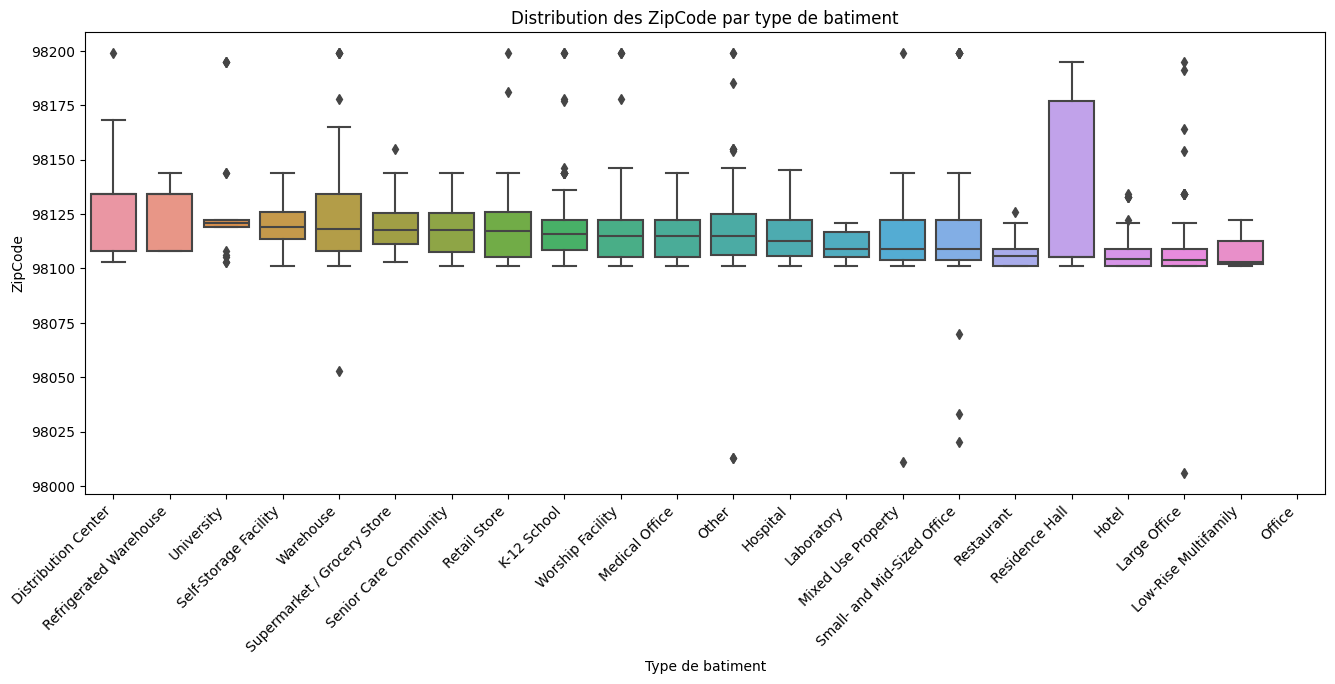

In [54]:

# distribution des ZipCode par type de batiment (PrimaryPropertyType) boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(data=data_non_R, x='PrimaryPropertyType', y='ZipCode', order=data_non_R.groupby('PrimaryPropertyType')['ZipCode'].median().sort_values(ascending=False).index)
plt.title('Distribution des ZipCode par type de batiment')
plt.xlabel('Type de batiment')
plt.ylabel('ZipCode')
plt.xticks(rotation=45, ha='right')
plt.show()


c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


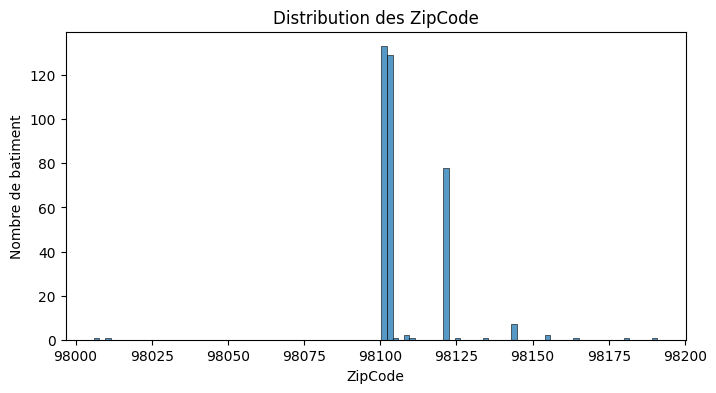

In [55]:

# focus sur le quartier downtown
data_non_R_downtown = data_non_R[data_non_R['Neighborhood'] == 'downtown']

# distribution des ZipCode
plt.figure(figsize=(8,4))
sns.histplot(data_non_R_downtown['ZipCode'], bins=100)
plt.title('Distribution des ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Nombre de batiment')
plt.show()


c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


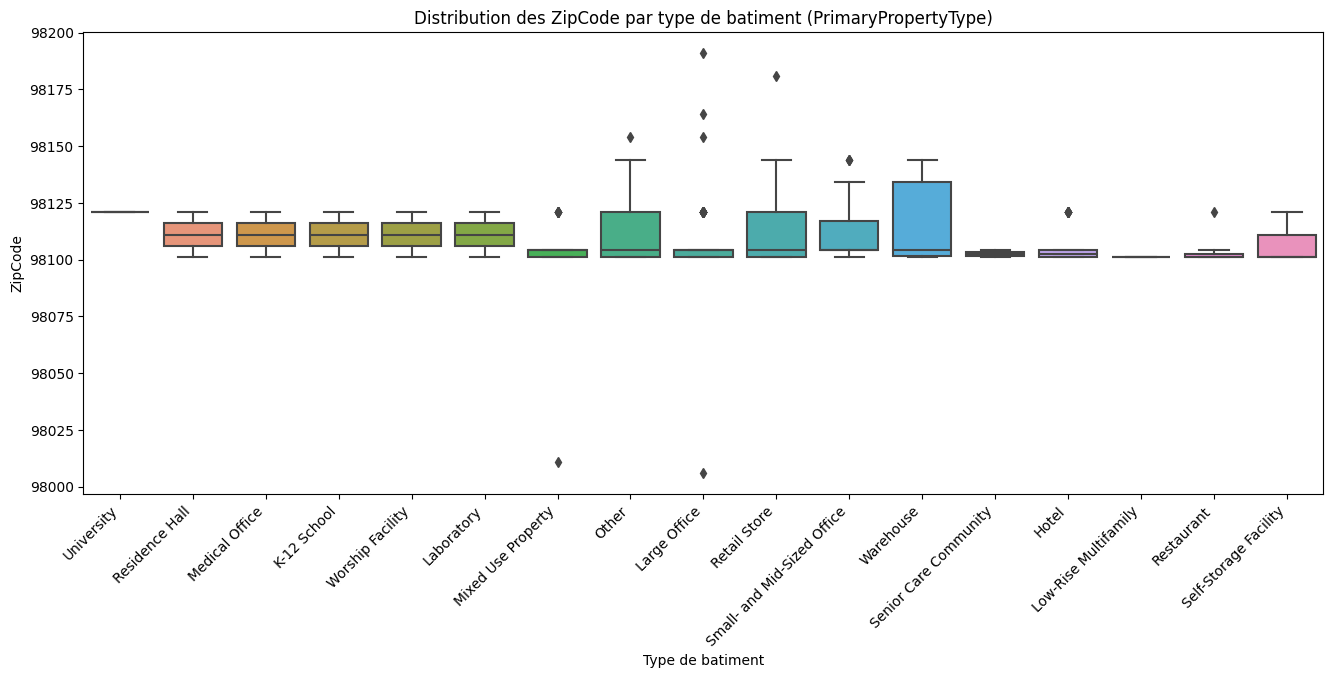

In [56]:
# boxplot des ZipCode par type de batiment (PrimaryPropertyType)
plt.figure(figsize=(16, 6))
sns.boxplot(data=data_non_R_downtown, x='PrimaryPropertyType', y='ZipCode', order=data_non_R_downtown.groupby('PrimaryPropertyType')['ZipCode'].median().sort_values(ascending=False).index)
plt.title('Distribution des ZipCode par type de batiment (PrimaryPropertyType)')
plt.xlabel('Type de batiment')
plt.ylabel('ZipCode')
plt.xticks(rotation=45, ha='right')
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


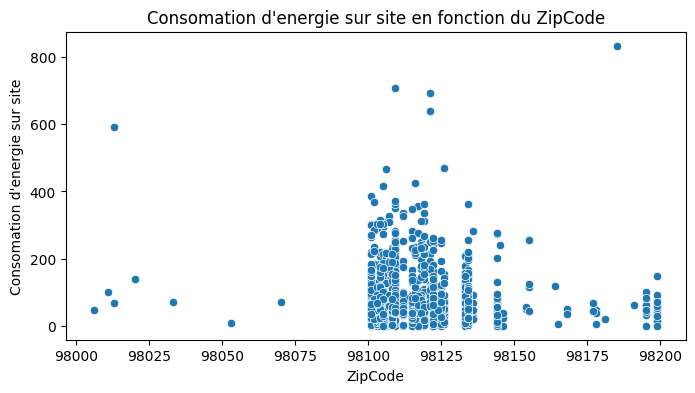

In [57]:
# plot de la consomation en fonction du ZipCode
plt.figure(figsize=(8,4))
sns.scatterplot(data=data_non_R, x='ZipCode', y='SiteEUIWN(kBtu/sf)')
plt.title('Consomation d\'energie sur site en fonction du ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Consomation d\'energie sur site')
plt.show()

##### TaxParcelIdentificationNumber
Nous analysons la variable 'TaxParcelIdentificationNumber' en la convertissant en une variable numérique. Nous explorons la relation entre cette variable et la consommation d'énergie sur site ainsi que les émissions de CO2.

In [58]:
data_non_R['TaxParcelId'] = data_non_R['TaxParcelIdentificationNumber'].astype(str).str[0:5]
data_non_R['TaxParcelId'].value_counts()


TaxParcelId
76662    175
52478     56
09420     35
19757     34
19772     27
        ... 
12823      1
08500      1
08110      1
01940      1
35583      1
Name: count, Length: 469, dtype: int64

In [59]:

# conversion de la variable 'TaxParcelId' en variable numérique
data_non_R['TaxParcelId'] = pd.to_numeric(data_non_R['TaxParcelId'], errors='coerce')


c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


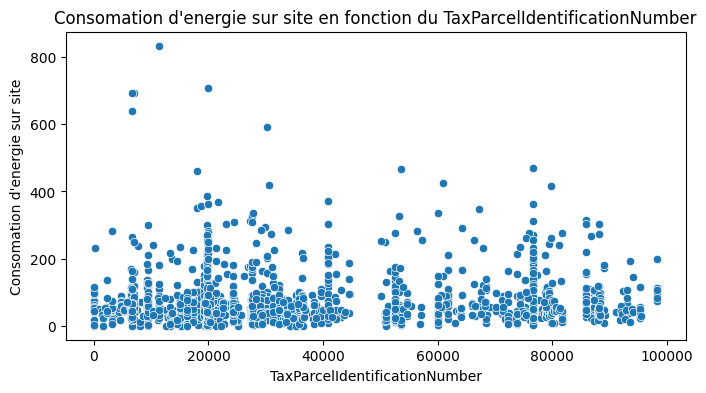

In [60]:
# plot de la consomation en fonction du TaxParcelIdentificationNumber
plt.figure(figsize=(8,4))
sns.scatterplot(data=data_non_R, x='TaxParcelId', y='SiteEUIWN(kBtu/sf)')
plt.title('Consomation d\'energie sur site en fonction du TaxParcelIdentificationNumber')
plt.xlabel('TaxParcelIdentificationNumber')
plt.ylabel('Consomation d\'energie sur site')
plt.show()


c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


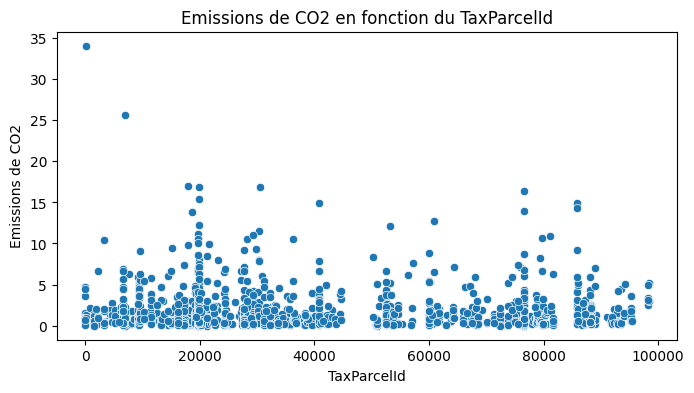

In [61]:
# plot de l'émission de CO2 en fonction du TaxParcelId

plt.figure(figsize=(8,4))
sns.scatterplot(data=data_non_R, x='TaxParcelId', y='GHGEmissionsIntensity')
plt.title('Emissions de CO2 en fonction du TaxParcelId')
plt.xlabel('TaxParcelId')
plt.ylabel('Emissions de CO2')
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


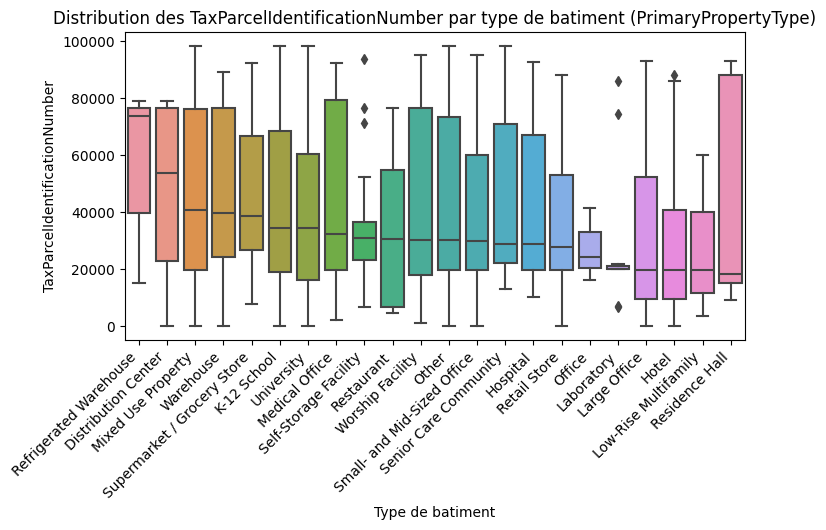

In [62]:
# boxplot du TaxParcelIdentificationNumber par type de batiment (PrimaryPropertyType)
plt.figure(figsize=(8,4))
sns.boxplot(data=data_non_R, x='PrimaryPropertyType', y='TaxParcelId', order=data_non_R.groupby('PrimaryPropertyType')['TaxParcelId'].median().sort_values(ascending=False).index)
plt.title('Distribution des TaxParcelIdentificationNumber par type de batiment (PrimaryPropertyType)')
plt.xlabel('Type de batiment')
plt.ylabel('TaxParcelIdentificationNumber')
plt.xticks(rotation=45, ha='right')
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


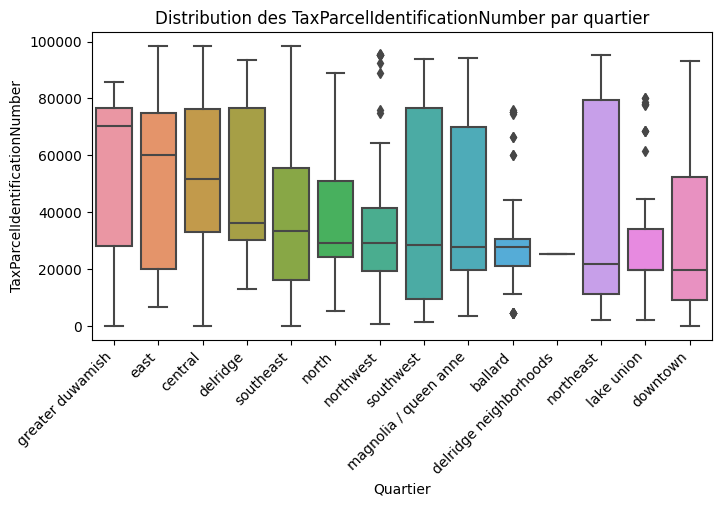

In [63]:
# boxplot du TaxParcelIdentificationNumber par quartier
plt.figure(figsize=(8,4))
sns.boxplot(data=data_non_R, x='Neighborhood', y='TaxParcelId', order=data_non_R.groupby('Neighborhood')['TaxParcelId'].median().sort_values(ascending=False).index)
plt.title('Distribution des TaxParcelIdentificationNumber par quartier')
plt.xlabel('Quartier')
plt.ylabel('TaxParcelIdentificationNumber')
plt.xticks(rotation=45, ha='right')

plt.show()

#### Outliers
Nous identifions les lignes marquées comme 'High outlier' et 'Low outlier' pour examiner les bâtiments qui pourraient avoir des valeurs extrêmes pour certaines variables. Nous supprimons également les lignes où le statut de conformité ('ComplianceStatus') est différent de 'Compliant'.

In [64]:
# affichage des ligne avec la variable 'Outlier' == 'High outlier', 'Low outlier'
data_non_R[data_non_R['Outlier'] == 'High outlier']

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
226            350      2016  NonResidential        Large Office   
517            704      2016  NonResidential        Large Office   

                   PropertyName              Address     City State  ZipCode  \
226  Second And Spring Building   1100 Second Avenue  Seattle    WA  98101.0   
517        401 Elliott Ave West  401 Elliot Ave West  Seattle    WA  98119.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode           Neighborhood  \
226                    0942000045                    7               downtown   
517                    7666202110                    7  magnolia / queen anne   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
226  47.60642 -122.33581       1958                1.0               6   
517  47.62235 -122.36378       2000                1.0               4   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
226            172842               25920                  146922   
517            129551               42500                   87051   

        ListOfAllPropertyUseTypes LargestPropertyUseType  \
226  Data Center, Office, Parking                 Office   
517  Data Center, Office, Parking                 Office   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
226                    99890.0                  Data Center   
517                    82273.0                      Parking   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
226                          39336.0                     Parking   
517                          42500.0                 Data Center   

     ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
226                         25000.0                      NaN              NaN   
517                          4778.0                      NaN              1.0   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
226        297.399994          299.200012          909.599976   
517        311.700012          311.700012          978.900024   

     SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
226            911.500000           41399504.0             41650404.0   
517            978.900024           27137190.0             27137190.0   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
226             0.0        11663150.0         39794668.0         16048.30957   
517             0.0         7953454.5         27137187.0             0.00000   

     NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus       Outlier  \
226         1604831.0        False       NaN    Non-Compliant  High outlier   
517               0.0        False       NaN    Non-Compliant  High outlier   

     TotalGHGEmissions  GHGEmissionsIntensity CategoryGroup CategorieEnergie  \
226             362.66                   2.10             0      Électricité   
517             189.18                   1.46             0      Électricité   

       LPUT   SLPUT  SuperficieParEtage  TaxParcelId  
226  Medium  Medium            24487.00         9420  
517  Medium  Medium            21762.75        76662

In [65]:
data_non_R[data_non_R['Outlier'] == 'Low outlier']

OSEBuildingID  DataYear        BuildingType  \
384             539      2016      NonResidential   
448             608      2016      NonResidential   
839           19967      2016   SPS-District K-12   
1045          20617      2016      NonResidential   
1229          21315      2016      NonResidential   
1295          21474      2016      NonResidential   
1611          22830      2016      NonResidential   
1945          23912      2016      NonResidential   
2129          24547      2016      NonResidential   
2189          24717      2016      NonResidential   
2216          24825      2016      NonResidential   
2410          25553      2016      NonResidential   
2450          25674      2016      NonResidential   
2801          27007      2016      NonResidential   
3152          43948      2016  Nonresidential COS   

              PrimaryPropertyType                    PropertyName  \
384                  Retail Store               University Center   
448                  Large Office          411 1ST AVE  S (ID608)   
839                   K-12 School                  Queen Anne Gym   
1045                 Retail Store           Seattle Habitat Store   
1229  Small- and Mid-Sized Office                 1518 Fifith Ave   
1295                        Other                  The Lusty Lady   
1611             Worship Facility                  Freedom Church   
1945  Small- and Mid-Sized Office                  1416 S Jackson   
2129                  K-12 School       Islamic School of Seattle   
2189                        Other        1701 First Ave South LLC   
2216  Small- and Mid-Sized Office                   2233 Building   
2410                        Hotel  J & M HOTEL BUILDING (ID25553)   
2450         Low-Rise Multifamily          (ID25674) COMET TAVERN   
2801             Worship Facility        Seattle Community Church   
3152                        Other           Georgetown Steamplant   

                        Address     City State  ZipCode  \
384       4501 Roosevelt Way NE  Seattle    WA  98105.0   
448               411 1ST AVE S  Seattle    WA  98104.0   
839              1431 2nd Ave N  Seattle    WA  98109.0   
1045             21 S Nevada St  Seattle    WA  98134.0   
1229             1520 Fifth Ave  Seattle    WA  98101.0   
1295               1315 1st Ave  Seattle    WA  98101.0   
1611              9601 35th Ave  Seattle    WA  98126.0   
1945  1416 South Jackson Street  Seattle    WA  98133.0   
2129               720 25TH AVE  Seattle    WA  98122.0   
2189       1701 First Ave South  Seattle    WA  98134.0   
2216         2233 1st AVE.South  Seattle    WA  98104.0   
2410              210 1St Ave S  Seattle    WA  98104.0   
2450              916 E PIKE ST  Seattle    WA  98122.0   
2801        4501 46th Avenue NE  Seattle    WA  98105.0   
3152     6605 13th Avenue South  Seattle    WA  98108.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
384                     5335200380                    4   
448                     5247800200                    2   
839                     0811000005                    7   
1045                    1824049074                    2   
1229                    1975700135                    7   
1295                    1976200060                    7   
1611                    2858600090                    1   
1945                    3320000165                    3   
2129                    6840700175                    3   
2189                    7666207085                    2   
2216                    7666207190                    2   
2410                    5247800130                    7   
2450                    6003500480                    3   
2801                    5364200005                    4   
3152                    0000000000                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
384               northeast  47.66178 -122.31812       1987   
448                downtown  47.5987

<Axes: ylabel='count'>

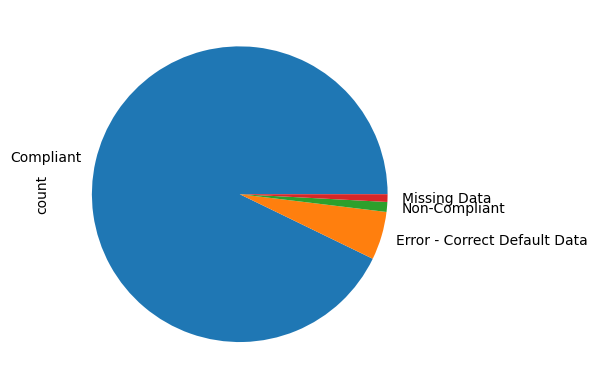

In [66]:
data_non_R['ComplianceStatus'].value_counts().plot.pie()

In [67]:
# suppression des lignes avec 'ComplianceStatus' different de 'Compliant'
data_non_R = data_non_R[data_non_R['ComplianceStatus'] == 'Compliant']

#### ENERGY STAR score

##### Distribution de l'ENERGYSTARScore
Nous visualisons la distribution de l'ENERGYSTARScore pour comprendre la répartition de cette variable dans notre dataset.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


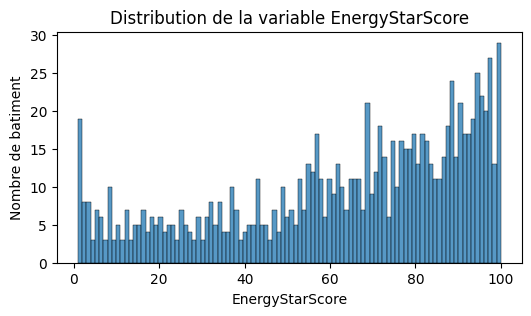

In [68]:
# distribution de la variable EnergyStarScore
plt.figure(figsize=(6,3))
sns.histplot(data_non_R['ENERGYSTARScore'], bins=100)
plt.title('Distribution de la variable EnergyStarScore')
plt.xlabel('EnergyStarScore')
plt.ylabel('Nombre de batiment')
plt.show()

##### Relation entre l'ENERGYSTARScore et la Consommation d'Énergie
Nous explorons la relation entre la consommation d'énergie sur site et l'ENERGYSTARScore, en colorant les points en fonction du type de propriété principale.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

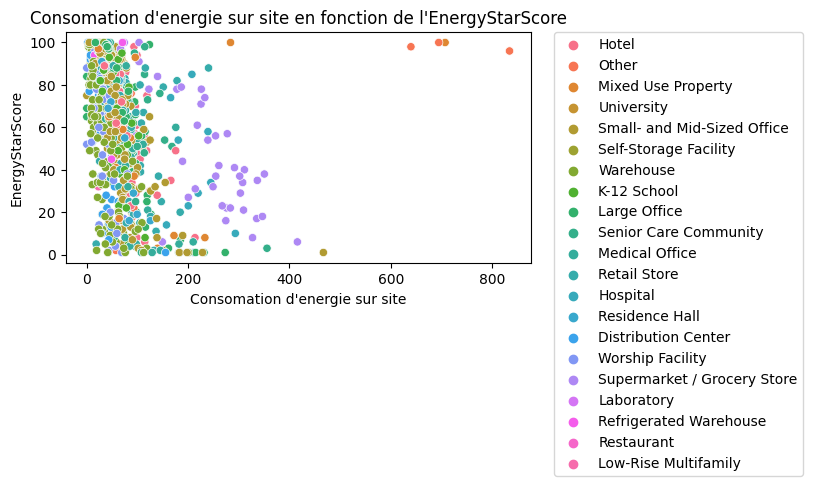

In [69]:
# plot de la consomation sur site et de l'EnergystarScore
plt.figure(figsize=(6,3))
sns.scatterplot(x=conso_site, y=data_non_R['ENERGYSTARScore'], hue=data_non_R['PrimaryPropertyType'])
plt.title('Consomation d\'energie sur site en fonction de l\'EnergyStarScore')
plt.xlabel('Consomation d\'energie sur site')
plt.ylabel('EnergyStarScore')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Relation entre l'ENERGYSTARScore et les Émissions de CO2
Nous analysons également la relation entre l'intensité des émissions de CO2 et l'ENERGYSTARScore, en utilisant la catégorie d'énergie pour colorer les points.

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

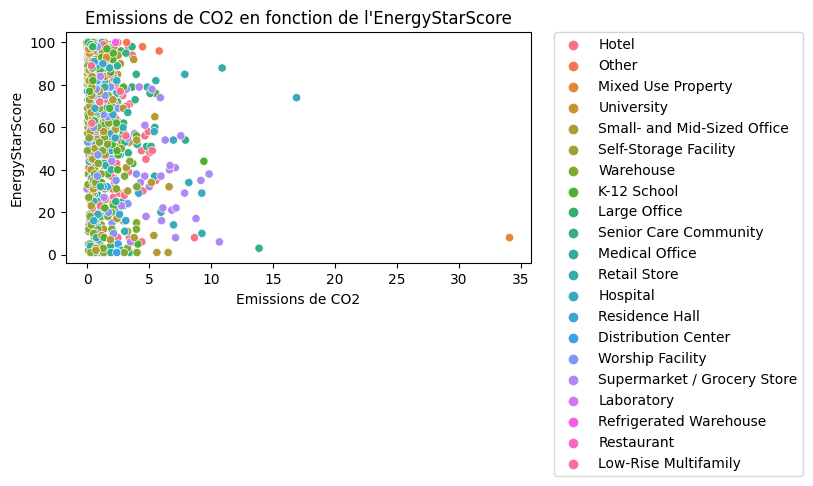

In [70]:
# plot des emissions de CO2 et de l'EnergystarScore avec la catégorie d'énergie en couleur
plt.figure(figsize=(6,3))
sns.scatterplot(x=CO2_intensity, y=data_non_R['ENERGYSTARScore'], hue=data_non_R['PrimaryPropertyType'])
plt.title('Emissions de CO2 en fonction de l\'EnergyStarScore')
plt.xlabel('Emissions de CO2')
plt.ylabel('EnergyStarScore')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


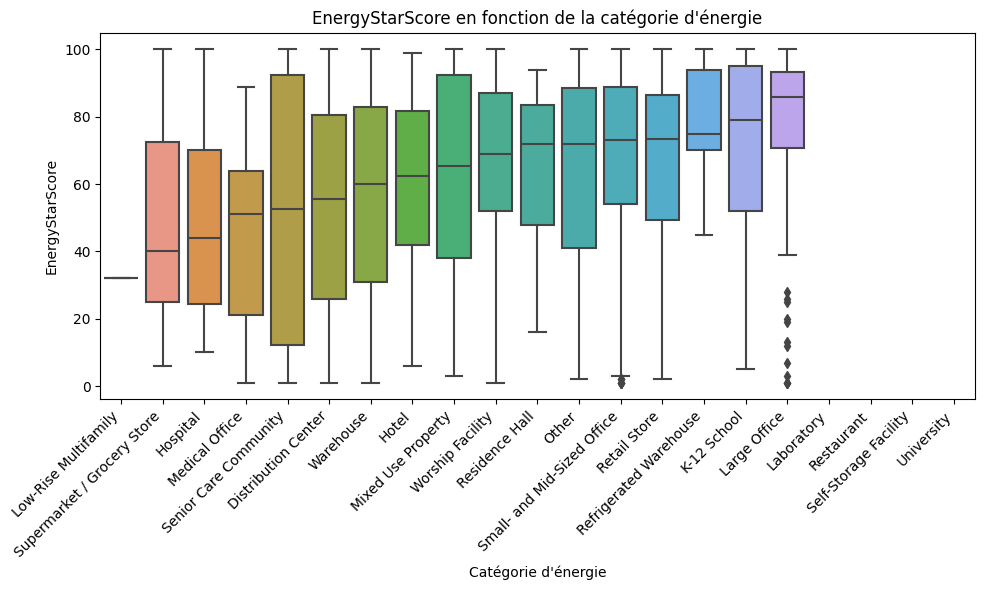

In [71]:
# boxplot de l'energystarScore en fonction de la catégorie d'énergie
# Calcul des médianes pour chaque catégorie d'énergie
medians = data_non_R.groupby('PrimaryPropertyType')['ENERGYSTARScore'].median().sort_values()

# Ordre des catégories d'énergie par médiane croissante pour le boxplot
ordered_categories = medians.index

# Création du boxplot avec les catégories ordonnées
plt.figure(figsize=(10, 6))
sns.boxplot(x='PrimaryPropertyType', y='ENERGYSTARScore', data=data_non_R, order=ordered_categories)
plt.title("EnergyStarScore en fonction de la catégorie d'énergie")
plt.xlabel('Catégorie d\'énergie')
plt.xticks(rotation=45, ha='right')
plt.ylabel('EnergyStarScore')
plt.tight_layout()  # Ajustement automatique de la figure
plt.show()

In [72]:
# coef de corrélation entre les variables EnergyStarScore et les variables de consomation d'energie et d'emission de CO2
data_non_R[['ENERGYSTARScore','SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity','PropertyGFABuilding(s)']].corr()

ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
ENERGYSTARScore                1.000000           -0.331334   
SiteEUIWN(kBtu/sf)            -0.331334            1.000000   
GHGEmissionsIntensity         -0.291502            0.727070   
PropertyGFABuilding(s)         0.136847           -0.007256   

                        GHGEmissionsIntensity  PropertyGFABuilding(s)  
ENERGYSTARScore                     -0.291502                0.136847  
SiteEUIWN(kBtu/sf)                   0.727070               -0.007256  
GHGEmissionsIntensity                1.000000                0.002727  
PropertyGFABuilding(s)               0.002727                1.000000

##### Imputation des Valeurs Manquantes de l'ENERGYSTARScore
Pour les valeurs manquantes de l'ENERGYSTARScore, nous utilisons des techniques d'imputation pour compléter les données. Nous testons deux méthodes d'imputation : l'IterativeImputer et le KNNImputer. Nous comparons les résultats des deux méthodes en utilisant des métriques d'erreur (MSE et MAE) pour évaluer leur performance. Nous visualisons également les valeurs imputées par rapport aux valeurs réelles pour vérifier l'exactitude de l'imputation.

In [73]:
data_non_R.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [74]:
cols=['GHGEmissionsIntensity','TotalGHGEmissions','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SourceEUI(kBtu/sf)',
      'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)',
      'NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','BuildingType','ENERGYSTARScore','LPUT','SLPUT']


# suppression des valeurs manquantes des colonnes
data_test=data_non_R[cols].dropna()

In [75]:
data_test.shape

(996, 19)

In [76]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import IterativeImputer, KNNImputer

X = data_test.drop('ENERGYSTARScore', axis=1)
y = data_test['ENERGYSTARScore']

mask = np.random.rand(len(y)) < 0.3
y_missing = y.copy()
y_missing[mask] = np.nan

In [77]:
# Préparation des données
X_numerical = X.select_dtypes(include=[np.number])
X_categorical = X.select_dtypes(exclude=[np.number])

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)

data_prepared = np.concatenate([X_numerical_scaled, X_categorical_encoded], axis=1)

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
# Concaténation de la colonne cible avec des valeurs manquantes aux caractéristiques
data_with_missing = np.column_stack((data_prepared, y_missing))

# Imputation avec IterativeImputer
iterative_imputer = IterativeImputer(random_state=0)
data_imputed_iterative = iterative_imputer.fit_transform(data_with_missing)

# Imputation avec KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
data_imputed_knn = knn_imputer.fit_transform(data_with_missing)

# Vous pouvez maintenant extraire la colonne imputée pour ENERGYSTARScore si nécessaire
y_imputed_iterative = data_imputed_iterative[:, -1]
y_imputed_knn = data_imputed_knn[:, -1]

In [79]:
# Indices où les valeurs étaient manquantes
indices_missing = np.where(mask)[0]

# Extraire les valeurs imputées pour ces indices
y_imputed_iterative_missing = data_imputed_iterative[indices_missing, -1]
y_imputed_knn_missing = data_imputed_knn[indices_missing, -1]

# Extraire les valeurs réelles pour ces indices
# Réinitialisation de l'index de y pour aligner avec les indices générés par mask
y_reset = y.reset_index(drop=True)

# Extraction des valeurs réelles pour les indices masqués
y_real_missing = y_reset[indices_missing]

In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

# Extraction des indices où les valeurs étaient manquantes à l'origine
indices_missing = np.where(mask)[0]

# Extraction des valeurs réelles pour ces indices
y_real_missing = y.iloc[indices_missing]

# Extraction des valeurs imputées pour ces indices (pour les deux imputeurs)
y_imputed_iterative_missing = data_imputed_iterative[indices_missing, -1]
y_imputed_knn_missing = data_imputed_knn[indices_missing, -1]

# Calcul du l'erreur pour IterativeImputer
mse_iterative = mean_squared_error(y_real_missing, y_imputed_iterative_missing)
mae_iterative = mean_absolute_error(y_real_missing, y_imputed_iterative_missing)

# Calcul de l'erreur pour KNNImputer
mse_knn = mean_squared_error(y_real_missing, y_imputed_knn_missing)
mae_knn = mean_absolute_error(y_real_missing, y_imputed_knn_missing)

# Affichage des mse
print(f"MSE pour IterativeImputer : {mse_iterative}")
print(f"MAE pour IterativeImputer : {mae_iterative}")
print(f"R2 pour IterativeImputer : {r2_score(y_real_missing, y_imputed_iterative_missing)}")

print(f"MSE pour KNNImputer : {mse_knn}")
print(f"MAE pour KNNImputer : {mae_knn}")
print(f"R2 pour KNNImputer : {r2_score(y_real_missing, y_imputed_knn_missing)}")

MSE pour IterativeImputer : 683.8594319086856
MAE pour IterativeImputer : 21.268394052292923
R2 pour IterativeImputer : 0.22759654956617892
MSE pour KNNImputer : 513.8674924924925
MAE pour KNNImputer : 16.6722972972973
R2 pour KNNImputer : 0.41959852310704715


c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


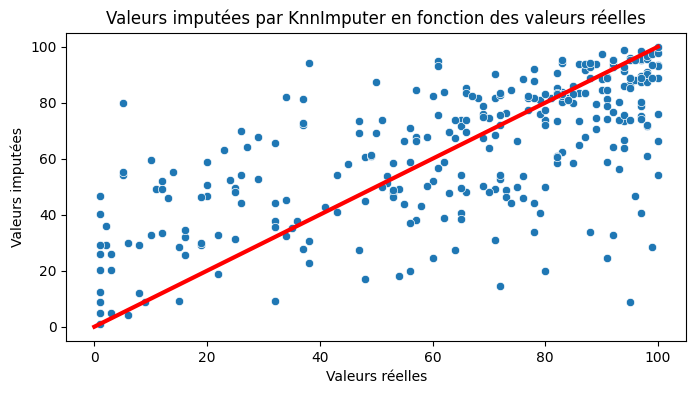

In [81]:
# visualisation des valeurs imputées par KnnImputer en fonction des valeurs réelles
plt.figure(figsize=(8,4))
sns.scatterplot(x=y_real_missing, y=y_imputed_knn_missing)
plt.title('Valeurs imputées par KnnImputer en fonction des valeurs réelles')
plt.plot([0, 100], [0, 100], color='red', lw=3)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs imputées')
plt.show()

##### Impuation avec KNNImputer sur le dataset général
Après avoir testé les méthodes d'imputation, nous appliquons l'imputation avec KNNImputer sur l'ensemble du dataset pour remplir les valeurs manquantes de l'ENERGYSTARScore. Nous vérifions ensuite les colonnes pour nous assurer que l'imputation a été réalisée correctement.


In [82]:
cols=['GHGEmissionsIntensity','TotalGHGEmissions','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SourceEUI(kBtu/sf)',
      'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)',
      'NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','BuildingType','ENERGYSTARScore','LPUT','SLPUT']

data_knn=data_non_R[cols]
data_knn.shape

(1548, 19)

In [83]:
X = data_knn.drop('ENERGYSTARScore', axis=1)
y = data_knn['ENERGYSTARScore']

# Préparation des données
X_numerical = X.select_dtypes(include=[np.number])
X_categorical = X.select_dtypes(exclude=[np.number])

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)

data_prepared = np.concatenate([X_numerical_scaled, X_categorical_encoded], axis=1)

# Concaténation de la colonne cible avec des valeurs manquantes aux caractéristiques
data_with_missing = np.column_stack((data_prepared, y))

# Imputation avec KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
data_imputed_knn = knn_imputer.fit_transform(data_with_missing)

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [84]:
# remplacement de la colonne de la variable cible par la colonne imputée
data_non_R['ENERGYSTARScore_imputer'] = data_imputed_knn[:, -1]

C:\Users\fathi\AppData\Local\Temp\ipykernel_17960\1375861169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_R['ENERGYSTARScore_imputer'] = data_imputed_knn[:, -1]


In [85]:
# vérification des colonne
data_non_R.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     downtown  47.61220   
1                    0659000220                    7     downtown  47.61317   
2                    0659000475                    7     downtown  47.61393   
3                    0659000640                    7     downtown  47.61412   
4                    0659000970                    7     downtown  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

### **3. Feature Engineering**

#### Selection des variables pertinantes

In [86]:
# slection des variables pertinantes
data_FE=data_non_R[['BuildingType','PrimaryPropertyType','YearBuilt','Neighborhood','NumberofFloors','PropertyGFAParking',
                    'PropertyGFABuilding(s)','ENERGYSTARScore_imputer','SiteEUIWN(kBtu/sf)','GHGEmissionsIntensity','CategorieEnergie',
                    'LPUT','SLPUT', 'ENERGYSTARScore']]

data_FE.columns

Index(['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'Neighborhood',
       'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ENERGYSTARScore_imputer', 'SiteEUIWN(kBtu/sf)',
       'GHGEmissionsIntensity', 'CategorieEnergie', 'LPUT', 'SLPUT',
       'ENERGYSTARScore'],
      dtype='object')

In [87]:
# sauvegarde du dataset filtré
data_FE.to_csv('./2016_Building_Energy_FE.csv', index=False)
# charger le dataset filtré
data_FE = pd.read_csv('./2016_Building_Energy_FE.csv')
data_FE.shape

(1548, 14)

#### Traitement des Variables Catégorielles
Nous identifions et transformons les variables catégorielles en utilisant l'encodage approprié pour préparer les données pour la modélisation.
- **Sources**: [Modèles supervisés non linéaires](https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires), Chapitre sur le prétraitement des données dans [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/), [Sklearn Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html).
- Identifier et transformer les variables catégorielles.

In [88]:
# Identification des variables catégorielles
# Nous considérons comme catégorielles les colonnes de type 'object' ou 'category'
categorical_columns = data_FE.select_dtypes(include=['object', 'category']).columns

# Affichage des variables catégorielles identifiées
categorical_columns


Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'CategorieEnergie', 'LPUT', 'SLPUT'],
      dtype='object')

In [89]:
# Initialisation de OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# abréviation des colonnes
data_FE.rename(columns={'BuildingType': 'BT', 'PrimaryPropertyType': 'PPT', 'CategorieEnergie': 'CE', 'Neighborhood': 'NH'}, inplace=True)

cols=['BT', 'PPT', 'CE','NH','LPUT','SLPUT']
# Application de OneHotEncoder aux variables catégorielles
encoded_categorical = onehot_encoder.fit_transform(data_FE[cols])

# Création d'un DataFrame pour les variables encodées
encoded_categorical_df = pd.DataFrame(encoded_categorical, 
                                      columns=onehot_encoder.get_feature_names_out(cols))

# Réinitialisation des index des deux DataFrames
data_FE.reset_index(drop=True, inplace=True)
encoded_categorical_df.reset_index(drop=True, inplace=True)

# Jointure des DataFrames
data_encoded = pd.concat([data_FE, encoded_categorical_df], axis=1)

# Suppression des variables catégorielles non encodées
data_encoded.drop(columns=cols, inplace=True)

# Affichage des premières lignes du nouveau DataFrame
data_encoded.shape

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(1548, 58)

#### Transformation Mathématique des Variables
Nous appliquons des transformations mathématiques pour normaliser les distributions des variables et améliorer la performance des modèles prédictifs.
  
- **Sources**: [Modèle prédictif linéaire](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire), [Box-Cox Transformation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html).
- Appliquer des transformations pour rendre les distributions plus normales.
- Normalisation des variables.


In [90]:
# Appliquer la transformation logarithmique aux variables cibles
data_encoded['SiteEUIWN_log'] = np.log1p(data_encoded['SiteEUIWN(kBtu/sf)'])
data_encoded['Intensity_log'] = np.log1p(data_encoded['GHGEmissionsIntensity'])

# Affichage des premières lignes avec les variables cibles transformées
data_encoded[['SiteEUIWN_log', 'Intensity_log']].head()

SiteEUIWN_log  Intensity_log
0       4.446174       1.342865
1       4.594109       1.350667
2       4.592085       1.160021
3       4.738827       1.735189
4       4.784989       1.355835

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

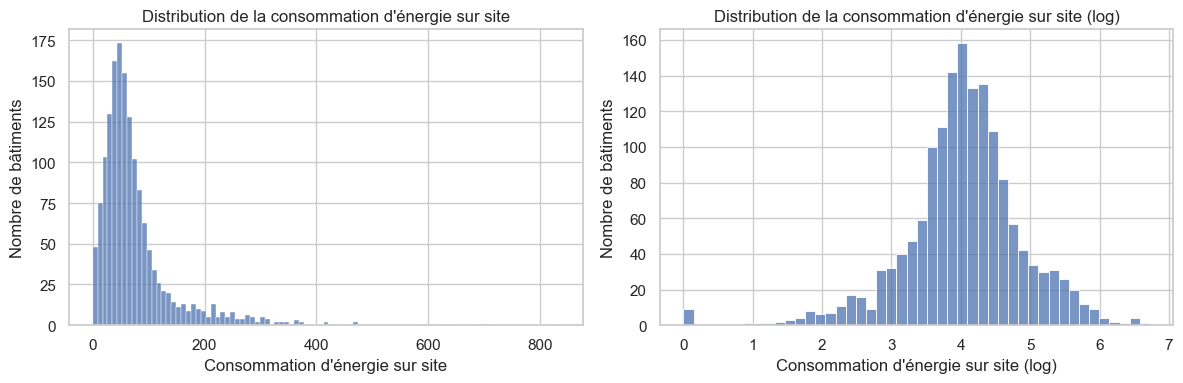

In [91]:
# Réglage du style des graphiques
sns.set(style="whitegrid")

# Création des graphiques
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Distribution de la variable cible SiteEUIWN(kBtu/sf)
sns.histplot(data_encoded['SiteEUIWN(kBtu/sf)'], ax=ax[0])
ax[0].set_title('Distribution de la consommation d\'énergie sur site')
ax[0].set_xlabel('Consommation d\'énergie sur site')
ax[0].set_ylabel('Nombre de bâtiments')

# Distribution de la variable cible SiteEUIWN_log
sns.histplot(data_encoded['SiteEUIWN_log'], ax=ax[1])
ax[1].set_title('Distribution de la consommation d\'énergie sur site (log)')
ax[1].set_xlabel('Consommation d\'énergie sur site (log)')
ax[1].set_ylabel('Nombre de bâtiments')

plt.tight_layout()
plt.show()

c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fathi\anaconda3\envs\OCR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

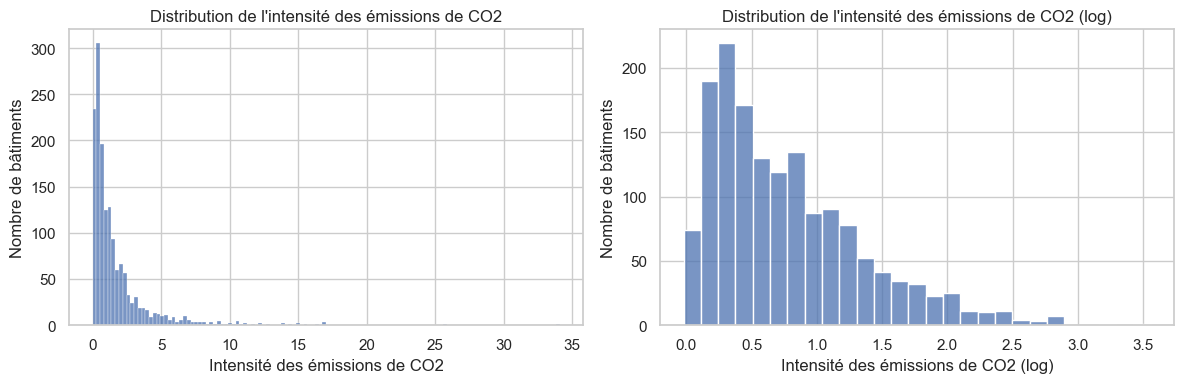

In [92]:
# Réglage du style des graphiques
sns.set(style="whitegrid")

# Création des graphiques
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Distribution de la variable cible SiteEUIWN(kBtu/sf)
sns.histplot(data_encoded['GHGEmissionsIntensity'], ax=ax[0])
ax[0].set_title('Distribution de l\'intensité des émissions de CO2')
ax[0].set_xlabel('Intensité des émissions de CO2')
ax[0].set_ylabel('Nombre de bâtiments')

# Distribution de la variable cible SiteEUIWN_log
sns.histplot(data_encoded['Intensity_log'], ax=ax[1])
ax[1].set_title('Distribution de l\'intensité des émissions de CO2 (log)')
ax[1].set_xlabel('Intensité des émissions de CO2 (log)')
ax[1].set_ylabel('Nombre de bâtiments')

plt.tight_layout()

In [93]:
# Ajout d'une constante à la variable cible pour éviter les valeurs nulles
data_encoded['NumberofFloors_log'] = np.log(data_encoded['NumberofFloors'] + 1)
data_encoded['PropertyGFAParking_log'] = np.log(data_encoded['PropertyGFAParking'] + 1)

# Appliquer la transformation logarithmique correctement
#data_encoded['SuperficieParEtage_log'] = np.log(data_encoded['SuperficieParEtage'] + 1)


# pour PropertyGFABuilding(s) et YearBuilt
data_encoded['PropertyGFABuilding(s)_log'] = np.log(data_encoded['PropertyGFABuilding(s)'])
data_encoded['YearBuilt_log'] = np.log(data_encoded['YearBuilt'])

In [94]:
data_encoded.shape

(1548, 64)

In [95]:
# suppression des colonnes originales
data_encoded.drop(columns=['NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)','YearBuilt'], inplace=True)

In [96]:
# les colonnes avec les plus de valmeurs manquantes
data_encoded.isna().sum().sort_values(ascending=False).head(5)

ENERGYSTARScore       551
SiteEUIWN(kBtu/sf)      1
SiteEUIWN_log           1
NH_northeast            0
CE_Électricité          0
dtype: int64

In [97]:
# suppression de la ligne avec la valeur manquante pour la colonne 'SiteEUIWN_log'
data_encoded.dropna(subset=['SiteEUIWN_log'], inplace=True)

In [98]:
# sauvegarde du dataset avec les variables encodées
data_encoded.to_csv('./2016_Building_Energy_Benchmarking_encoded.csv', index=False)

In [99]:
data_encoded.head()

ENERGYSTARScore_imputer  SiteEUIWN(kBtu/sf)  GHGEmissionsIntensity  \
0                     60.0           84.300003                   2.83   
1                     61.0           97.900002                   2.86   
2                     43.0           97.699997                   2.19   
3                     56.0          113.300003                   4.67   
4                     75.0          118.699997                   2.88   

   ENERGYSTARScore  BT_NonResidential  BT_Nonresidential COS  \
0             60.0                1.0                    0.0   
1             61.0                1.0                    0.0   
2             43.0                1.0                    0.0   
3             56.0                1.0                    0.0   
4             75.0                1.0                    0.0   

   BT_Nonresidential WA  BT_SPS-District K-12  PPT_Hospital  PPT_Hotel  \
0                   0.0                   0.0           0.0        1.0   
1                   0.0                   0.0           0.0        1.0   
2                   0.0                   0.0           0.0        1.0   
3                   0.0                   0.0           0.0        1.0   
4                   0.0                   0.0           0.0        1.0   

   PPT_K-12 School  PPT_Laboratory  PPT_Large Office  \
0              0.0             0.0               0.0   
1              0.0             0.0               0.0   
2              0.0             0.0               0.0   
3              0.0             0.0               0.0   
4              0.0             0.0               0.0   

   PPT_Low-Rise Multifamily  PPT_Medical Office  PPT_Mixed Use Property  \
0                       0.0                 0.0                     0.0   
1                       0.0                 0.0                     0.0   
2                       0.0                 0.0                     0.0   
3                       0.0                 0.0                     0.0   
4                       0.0                 0.0                     0.0   

   PPT_Other  PPT_Refrigerated Warehouse  PPT_Residence Hall  PPT_Restaurant  \
0        0.0                         0.0                 0.0             0.0   
1        0.0                         0.0                 0.0             0.0   
2        0.0                         0.0                 0.0             0.0   
3        0.0                         0.0                 0.0             0.0   
4        0.0                         0.0                 0.0             0.0   

   PPT_Retail Store  PPT_Self-Storage Facility  PPT_Senior Care Community  \
0               0.0                        0.0                        0.0   
1               0.0                        0.0                        0.0   
2               0.0                        0.0                        0.0   
3               0.0                        0.0                        0.0   
4               0.0                        0.0                        0.0   

   PPT_Small- and Mid-Sized Office  PPT_Supermarket / Grocery Store  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   PPT_University  PPT_Warehouse  PPT_Worship Facility  \
0             0.0            0.0                   0.0   
1             0.0            0.0                   0.0   
2             0.0            0.0                   0.0   
3             0.0            0.0                   0.0   
4             0.0            0.0                   0.0   

   CE_GazNaturel & Électricité  CE_Mixte  CE_Vapeur  CE_Vapeur & Électricité  \
0                          0.0       1.0        0.0                      0.0   
1                          1.0       0.0        0.0               

In [100]:
data_encoded.dropna(inplace=True)

In [101]:
data_encoded.shape

(996, 60)